In [1]:
#imports
import config
import spotipy
import pandas as pd
import json
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import pycountry
import re
import json
import numpy as np
import pprint
import pickle

%matplotlib inline

from sklearn import datasets # sklearn comes with some toy datasets to practice

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

from IPython.display import IFrame

from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder, OrdinalEncoder, Normalizer, RobustScaler, QuantileTransformer

from spotipy.oauth2 import SpotifyClientCredentials


In [2]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

results = sp.search(q="macarena",limit=1,market="ES")
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=macarena&type=track&market=ES&offset=0&limit=1',
  'items': [{'album': {'album_type': 'compilation',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'},
       'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of',
       'id': '0LyfQWJT6nXafLPZqxe9Of',
       'name': 'Various Artists',
       'type': 'artist',
       'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/5hiQZaZeGH7HWy2VjDwTcZ'},
     'href': 'https://api.spotify.com/v1/albums/5hiQZaZeGH7HWy2VjDwTcZ',
     'id': '5hiQZaZeGH7HWy2VjDwTcZ',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b273b32c683cba9d35640c19ef21',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e02b32c683cba9d35640c19ef21',
       'width': 300},
      {'height': 64,
       'url': 'h

In [3]:
results = sp.search(q="Rihanna Pon de Replay",limit=1,market="DE")
results['tracks']['items'][0]['id']

'4TsmezEQVSZNNPv5RJ65Ov'

In [4]:
#pprint.pprint(results)

In [5]:
len(results["tracks"]["items"][0])

18

In [6]:
#define a function to get the playlist ids/songs using the Spotify Web API
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [7]:
#retrieves the rock playlist from spotify
rock = get_playlist_tracks('Spotify','37i9dQZF1DWXRqgorJj26U')

#create the ids of rock songs
rock_ids =[]
for i in rock:
    rock_ids.append(i['track']['id'])
    
#check the length
len(rock_ids)

200

In [8]:
#chop into chunks of 100 by creating 2 lists of list because you can't have more than a list of 100
chunk_size = 100
rock_ids_chopped = [rock_ids[i:i+chunk_size] for i in range(0,len(rock_ids), 100)]

In [9]:
#displays the extended list of list of rock_af
rock_af = []
for i in rock_ids_chopped:
    rock_af.extend(sp.audio_features(i))

In [10]:
#create a rock_df DF
rock_df = pd.DataFrame(rock_af)
rock_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.502,0.890,4,-5.175,1,0.0364,0.000147,0.011700,0.2170,0.259,133.520,audio_features,57bgtoPSgt236HzfBOd8kj,spotify:track:57bgtoPSgt236HzfBOd8kj,https://api.spotify.com/v1/tracks/57bgtoPSgt23...,https://api.spotify.com/v1/audio-analysis/57bg...,292880,4
1,0.828,0.492,0,-9.744,1,0.0276,0.064400,0.004280,0.1280,0.789,120.151,audio_features,0ofHAoxe9vBkTCp2UQIavz,spotify:track:0ofHAoxe9vBkTCp2UQIavz,https://api.spotify.com/v1/tracks/0ofHAoxe9vBk...,https://api.spotify.com/v1/audio-analysis/0ofH...,257800,4
2,0.464,0.795,1,-9.267,1,0.0926,0.049300,0.002440,0.3990,0.612,158.691,audio_features,63T7DJ1AFDD6Bn8VzG6JE8,spotify:track:63T7DJ1AFDD6Bn8VzG6JE8,https://api.spotify.com/v1/tracks/63T7DJ1AFDD6...,https://api.spotify.com/v1/audio-analysis/63T7...,202267,4
3,0.505,0.754,4,-7.435,1,0.0366,0.132000,0.000000,0.2040,0.510,119.204,audio_features,5RKQ5NdjSh2QzD4MaunT91,spotify:track:5RKQ5NdjSh2QzD4MaunT91,https://api.spotify.com/v1/tracks/5RKQ5NdjSh2Q...,https://api.spotify.com/v1/audio-analysis/5RKQ...,249600,4
4,0.579,0.508,2,-9.484,1,0.0270,0.005740,0.000494,0.0575,0.609,147.125,audio_features,40riOy7x9W7GXjyGp4pjAv,spotify:track:40riOy7x9W7GXjyGp4pjAv,https://api.spotify.com/v1/tracks/40riOy7x9W7G...,https://api.spotify.com/v1/audio-analysis/40ri...,391376,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.595,0.996,2,-3.418,1,0.0599,0.195000,0.034500,0.0351,0.376,152.049,audio_features,5o37x6LpNSec4jSfPIChsQ,spotify:track:5o37x6LpNSec4jSfPIChsQ,https://api.spotify.com/v1/tracks/5o37x6LpNSec...,https://api.spotify.com/v1/audio-analysis/5o37...,151107,4
196,0.615,0.910,11,-4.248,1,0.0347,0.500000,0.511000,0.2810,0.770,111.013,audio_features,4hq0S6wznq7SHDyMOFXL9i,spotify:track:4hq0S6wznq7SHDyMOFXL9i,https://api.spotify.com/v1/tracks/4hq0S6wznq7S...,https://api.spotify.com/v1/audio-analysis/4hq0...,226333,4
197,0.532,0.767,7,-5.509,1,0.0574,0.002870,0.000513,0.3900,0.755,127.361,audio_features,2SiXAy7TuUkycRVbbWDEpo,spotify:track:2SiXAy7TuUkycRVbbWDEpo,https://api.spotify.com/v1/tracks/2SiXAy7TuUky...,https://api.spotify.com/v1/audio-analysis/2SiX...,210173,4
198,0.464,0.655,7,-9.058,0,0.0608,0.027200,0.000001,0.3280,0.531,169.515,audio_features,3dmqIB2Qxe2XZobw9gXxJ6,spotify:track:3dmqIB2Qxe2XZobw9gXxJ6,https://api.spotify.com/v1/tracks/3dmqIB2Qxe2X...,https://api.spotify.com/v1/audio-analysis/3dmq...,273600,4


In [11]:
#Export to csv
rock_df.to_csv("rock_df.csv", index=False)

In [12]:
#h80s_tracks = get_playlist_tracks('Spotify','37i9dQZF1DXdCc7Q1hwtuv')

In [13]:
#retrieves the ids of h80s songs
h80s_tracks = get_playlist_tracks("Spotify","37i9dQZF1DXdCc7Q1hwtuv")

h80s_ids = []
for i in h80s_tracks:
    h80s_ids.append(i['track']['id'])
 
h80s_af = sp.audio_features(h80s_ids)

In [14]:
#check the length
len(h80s_ids)

70

In [15]:
#create and displays the audio features of h80s_tracks
h80s_af = sp.audio_features(h80s_ids)

# Display only the first elements of the list
h80s_af = h80s_af[:1]
h80s_af

[{'danceability': 0.82,
  'energy': 0.452,
  'key': 1,
  'loudness': -9.796,
  'mode': 1,
  'speechiness': 0.0348,
  'acousticness': 0.543,
  'instrumentalness': 0.00294,
  'liveness': 0.0714,
  'valence': 0.74,
  'tempo': 117.401,
  'type': 'audio_features',
  'id': '1JSTJqkT5qHq8MDJnJbRE1',
  'uri': 'spotify:track:1JSTJqkT5qHq8MDJnJbRE1',
  'track_href': 'https://api.spotify.com/v1/tracks/1JSTJqkT5qHq8MDJnJbRE1',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1JSTJqkT5qHq8MDJnJbRE1',
  'duration_ms': 253920,
  'time_signature': 4}]

In [16]:
#create a h80s_df DF
h80s_df = pd.DataFrame(h80s_af)
len(h80s_ids)
#h80s_df

70

In [17]:
#Export h80s_df to csv
h80s_df.to_csv("h80s_df.csv", index=False)

In [18]:
#retrieves the ids of h90s_tracks songs
h90s_tracks = get_playlist_tracks('Spotify','37i9dQZF1DWTWEW1zqSeEj')

h90s_ids = []
for i in h90s_tracks:
    h90s_ids.append(i['track']['id'])
 
h90s_af = sp.audio_features(h90s_ids)

# Display only the first elements of the list
h90s_af = h90s_af[:1]
h90s_af
#len(h90s_ids)

[{'danceability': 0.647,
  'energy': 0.514,
  'key': 8,
  'loudness': -10.05,
  'mode': 1,
  'speechiness': 0.0593,
  'acousticness': 0.0655,
  'instrumentalness': 0,
  'liveness': 0.398,
  'valence': 0.386,
  'tempo': 79.975,
  'type': 'audio_features',
  'id': '1DIXPcTDzTj8ZMHt3PDt8p',
  'uri': 'spotify:track:1DIXPcTDzTj8ZMHt3PDt8p',
  'track_href': 'https://api.spotify.com/v1/tracks/1DIXPcTDzTj8ZMHt3PDt8p',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1DIXPcTDzTj8ZMHt3PDt8p',
  'duration_ms': 240693,
  'time_signature': 4}]

In [19]:
#create a h90s_df DF
h90s_df = pd.DataFrame(h90s_af)
h90s_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.647,0.514,8,-10.05,1,0.0593,0.0655,0,0.398,0.386,79.975,audio_features,1DIXPcTDzTj8ZMHt3PDt8p,spotify:track:1DIXPcTDzTj8ZMHt3PDt8p,https://api.spotify.com/v1/tracks/1DIXPcTDzTj8...,https://api.spotify.com/v1/audio-analysis/1DIX...,240693,4


In [20]:
#Export to csv
h90s_df.to_csv("h90s_df.csv", index=False)

In [21]:
#retrieves the ids of disney_tracks songs
disney_tracks = get_playlist_tracks("Spotify","37i9dQZF1DXbz4oNHFacRG")

disney_ids = []
for i in disney_tracks:
    disney_ids.append(i['track']['id'])
 
disney_af = sp.audio_features(disney_ids)

# Display only the first elements of the list
disney_af = disney_af[:1]
disney_af

[{'danceability': 0.775,
  'energy': 0.676,
  'key': 4,
  'loudness': -10.249,
  'mode': 0,
  'speechiness': 0.313,
  'acousticness': 0.0458,
  'instrumentalness': 0.000218,
  'liveness': 0.0957,
  'valence': 0.491,
  'tempo': 140.036,
  'type': 'audio_features',
  'id': '5G5hspjbhZC9s6btkm76rN',
  'uri': 'spotify:track:5G5hspjbhZC9s6btkm76rN',
  'track_href': 'https://api.spotify.com/v1/tracks/5G5hspjbhZC9s6btkm76rN',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5G5hspjbhZC9s6btkm76rN',
  'duration_ms': 184867,
  'time_signature': 4}]

In [22]:
#create a disney_df DF
disney_df = pd.DataFrame(disney_af)
disney_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.775,0.676,4,-10.249,0,0.313,0.0458,0.000218,0.0957,0.491,140.036,audio_features,5G5hspjbhZC9s6btkm76rN,spotify:track:5G5hspjbhZC9s6btkm76rN,https://api.spotify.com/v1/tracks/5G5hspjbhZC9...,https://api.spotify.com/v1/audio-analysis/5G5h...,184867,4


In [23]:
#Export disney_df to csv
disney_df.to_csv("disney_df.csv", index=False)

In [24]:
#retrieves the ids of s70s_soul songs

s70s_soul = get_playlist_tracks("Spotify","37i9dQZF1DWULEW2RfoSCi")

s70s_soul_ids = []
for i in s70s_soul:
    s70s_soul_ids.append(i['track']['id'])
 
s70s_soul_af = sp.audio_features(s70s_soul_ids)

# Display only the first elements of the list
s70s_soul_af = s70s_soul_af[:1]
s70s_soul_af
#len(s70s_soul_ids)

[{'danceability': 0.756,
  'energy': 0.401,
  'key': 7,
  'loudness': -10.702,
  'mode': 0,
  'speechiness': 0.0526,
  'acousticness': 0.582,
  'instrumentalness': 0.011,
  'liveness': 0.0541,
  'valence': 0.514,
  'tempo': 101.954,
  'type': 'audio_features',
  'id': '63xdwScd1Ai1GigAwQxE8y',
  'uri': 'spotify:track:63xdwScd1Ai1GigAwQxE8y',
  'track_href': 'https://api.spotify.com/v1/tracks/63xdwScd1Ai1GigAwQxE8y',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/63xdwScd1Ai1GigAwQxE8y',
  'duration_ms': 199396,
  'time_signature': 4}]

In [25]:
#create a DF
s70s_soul_df = pd.DataFrame(s70s_soul_af)
s70s_soul_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.756,0.401,7,-10.702,0,0.0526,0.582,0.011,0.0541,0.514,101.954,audio_features,63xdwScd1Ai1GigAwQxE8y,spotify:track:63xdwScd1Ai1GigAwQxE8y,https://api.spotify.com/v1/tracks/63xdwScd1Ai1...,https://api.spotify.com/v1/audio-analysis/63xd...,199396,4


In [26]:
#Export to s70s_soul_df to csv
s70s_soul_df.to_csv("s70s_soul_df.csv", index=False)

In [27]:
#retrieves the ids of afroheat songs

afroheat = get_playlist_tracks("Spotify","37i9dQZF1DWYkaDif7Ztbp")

afroheat_ids = []
for i in afroheat:
    afroheat_ids.append(i['track']['id'])
 
afroheat_af = sp.audio_features(afroheat_ids)

# Display only the first elements of the list
afroheat_af = afroheat_af[:1]

#len(afroheat_ids)
afroheat_af

[{'danceability': 0.823,
  'energy': 0.415,
  'key': 5,
  'loudness': -10.845,
  'mode': 0,
  'speechiness': 0.0637,
  'acousticness': 0.471,
  'instrumentalness': 0.0316,
  'liveness': 0.128,
  'valence': 0.488,
  'tempo': 113.976,
  'type': 'audio_features',
  'id': '0zVk3uuV9UhxAt48F3OL12',
  'uri': 'spotify:track:0zVk3uuV9UhxAt48F3OL12',
  'track_href': 'https://api.spotify.com/v1/tracks/0zVk3uuV9UhxAt48F3OL12',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0zVk3uuV9UhxAt48F3OL12',
  'duration_ms': 186154,
  'time_signature': 4}]

In [28]:
#create afroheat DF
afroheat_df = pd.DataFrame(afroheat_af)
afroheat_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.823,0.415,5,-10.845,0,0.0637,0.471,0.0316,0.128,0.488,113.976,audio_features,0zVk3uuV9UhxAt48F3OL12,spotify:track:0zVk3uuV9UhxAt48F3OL12,https://api.spotify.com/v1/tracks/0zVk3uuV9Uhx...,https://api.spotify.com/v1/audio-analysis/0zVk...,186154,4


In [29]:
#Export to csv
afroheat_df.to_csv("afroheat_df.csv", index=False)

In [30]:
#retrieves the ids of 70s_soul songs

amanpiano = get_playlist_tracks("Spotify","4Ymf8eaPQGT7HMTymoX82f")

amanpiano_ids = []
for i in amanpiano:
    amanpiano_ids.append(i['track']['id'])
 
amanpiano_af = sp.audio_features(amanpiano_ids)

# Display only the first elements of the list
amanpiano_af = amanpiano_af[:1]

#len(amanpiano_ids)

amanpiano_af

[{'danceability': 0.842,
  'energy': 0.504,
  'key': 1,
  'loudness': -7.557,
  'mode': 1,
  'speechiness': 0.0534,
  'acousticness': 0.0246,
  'instrumentalness': 0.0139,
  'liveness': 0.0698,
  'valence': 0.495,
  'tempo': 112.995,
  'type': 'audio_features',
  'id': '5tpft20jhQvRlG3O7XfwWy',
  'uri': 'spotify:track:5tpft20jhQvRlG3O7XfwWy',
  'track_href': 'https://api.spotify.com/v1/tracks/5tpft20jhQvRlG3O7XfwWy',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5tpft20jhQvRlG3O7XfwWy',
  'duration_ms': 391888,
  'time_signature': 4}]

In [31]:
#create an amanpiano_df DF
amanpiano_df = pd.DataFrame(amanpiano_af)
amanpiano_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.842,0.504,1,-7.557,1,0.0534,0.0246,0.0139,0.0698,0.495,112.995,audio_features,5tpft20jhQvRlG3O7XfwWy,spotify:track:5tpft20jhQvRlG3O7XfwWy,https://api.spotify.com/v1/tracks/5tpft20jhQvR...,https://api.spotify.com/v1/audio-analysis/5tpf...,391888,4


In [32]:
#Export amanpiano_df to csv
amanpiano_df.to_csv("amanpiano_df.csv", index=False)

In [33]:
#retrieves the ids of afropop songs

afropop = get_playlist_tracks("Spotify","37i9dQZF1DWYs2pvwxWA7l")

afropop_ids = []
for i in afropop:
    afropop_ids.append(i['track']['id'])
 
afropop_af = sp.audio_features(afropop_ids)

# Display only the first elements of the list
afropop_af = afropop_af[:1]

len(afropop_ids)

afropop_af

[{'danceability': 0.775,
  'energy': 0.662,
  'key': 10,
  'loudness': -7.755,
  'mode': 1,
  'speechiness': 0.0408,
  'acousticness': 0.117,
  'instrumentalness': 0.0648,
  'liveness': 0.0928,
  'valence': 0.257,
  'tempo': 112.014,
  'type': 'audio_features',
  'id': '4nFrcGM7MY1mpoQCC7Kefj',
  'uri': 'spotify:track:4nFrcGM7MY1mpoQCC7Kefj',
  'track_href': 'https://api.spotify.com/v1/tracks/4nFrcGM7MY1mpoQCC7Kefj',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4nFrcGM7MY1mpoQCC7Kefj',
  'duration_ms': 192936,
  'time_signature': 4}]

In [34]:
#create a afropop_df DF
afropop_df = pd.DataFrame(afropop_af)
afropop_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.775,0.662,10,-7.755,1,0.0408,0.117,0.0648,0.0928,0.257,112.014,audio_features,4nFrcGM7MY1mpoQCC7Kefj,spotify:track:4nFrcGM7MY1mpoQCC7Kefj,https://api.spotify.com/v1/tracks/4nFrcGM7MY1m...,https://api.spotify.com/v1/audio-analysis/4nFr...,192936,4


In [35]:
#Export afropop_df to csv
afropop_df.to_csv("afropop_df.csv", index=False)

In [36]:
#displays the ids of jazz songs

jazz = get_playlist_tracks("Spotify","4hLLe0dZsKm2yeXF7vwNDq")

jazz_ids = []
for i in jazz:
    jazz_ids.append(i['track']['id'])
 
jazz_af = sp.audio_features(jazz_ids)

# Display only the first elements of the list
jazz_af = jazz_af[:1]

len(jazz_ids)
jazz_af

[{'danceability': 0.457,
  'energy': 0.219,
  'key': 8,
  'loudness': -15.325,
  'mode': 0,
  'speechiness': 0.0385,
  'acousticness': 0.545,
  'instrumentalness': 0.00098,
  'liveness': 0.0681,
  'valence': 0.62,
  'tempo': 168.55,
  'type': 'audio_features',
  'id': '5p6me2mwQrGfH30eExHn6v',
  'uri': 'spotify:track:5p6me2mwQrGfH30eExHn6v',
  'track_href': 'https://api.spotify.com/v1/tracks/5p6me2mwQrGfH30eExHn6v',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5p6me2mwQrGfH30eExHn6v',
  'duration_ms': 323067,
  'time_signature': 5}]

In [37]:
#create a jazz_df DF
jazz_df = pd.DataFrame(jazz_af)
jazz_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.457,0.219,8,-15.325,0,0.0385,0.545,0.00098,0.0681,0.62,168.55,audio_features,5p6me2mwQrGfH30eExHn6v,spotify:track:5p6me2mwQrGfH30eExHn6v,https://api.spotify.com/v1/tracks/5p6me2mwQrGf...,https://api.spotify.com/v1/audio-analysis/5p6m...,323067,5


In [38]:
#Export jazz_df to csv
jazz_df.to_csv("jazz_df.csv", index=False)

In [39]:
#displays the ids of dance23 songs

dance = get_playlist_tracks("Spotify","37i9dQZF1DXaalFZGChkqa")

dance_ids = []
for i in dance:
    dance_ids.append(i['track']['id'])
 
dance_af = sp.audio_features(dance_ids)

# Display only the first elements of the list
dance_af = dance_af[:1]

len(dance_ids)

dance_af


[{'danceability': 0.733,
  'energy': 0.976,
  'key': 5,
  'loudness': -5.305,
  'mode': 1,
  'speechiness': 0.045,
  'acousticness': 0.0294,
  'instrumentalness': 7.12e-05,
  'liveness': 0.25,
  'valence': 0.523,
  'tempo': 144.989,
  'type': 'audio_features',
  'id': '0QlOkt8nkZ8zqu8xb2SHU8',
  'uri': 'spotify:track:0QlOkt8nkZ8zqu8xb2SHU8',
  'track_href': 'https://api.spotify.com/v1/tracks/0QlOkt8nkZ8zqu8xb2SHU8',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0QlOkt8nkZ8zqu8xb2SHU8',
  'duration_ms': 163034,
  'time_signature': 4}]

In [40]:
#create a DF
dance_df = pd.DataFrame(dance_af)
dance_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.733,0.976,5,-5.305,1,0.045,0.0294,0.000071,0.25,0.523,144.989,audio_features,0QlOkt8nkZ8zqu8xb2SHU8,spotify:track:0QlOkt8nkZ8zqu8xb2SHU8,https://api.spotify.com/v1/tracks/0QlOkt8nkZ8z...,https://api.spotify.com/v1/audio-analysis/0QlO...,163034,4


In [41]:
#Export dance_df to csv
dance_df.to_csv("dance_df.csv", index=False)

In [42]:
#save the ids of rock song into bestrock_ids variable
bestrock = get_playlist_tracks('Spotify','1puQ0hv40TUre24cFillJS')

In [43]:
#retrieves the ids of bestrock_ids songs
bestrock_ids =[]
for i in bestrock:
    bestrock_ids.append(i['track']['id'])
    
#chop into chunks of 100 by creating 2 lists of list because you can't have more than a list of 100
chunk_size = 100
bestrock_ids_chopped = [bestrock_ids[i:i+chunk_size] for i in range(0,len(bestrock_ids), 100)]
len(bestrock_ids)

1044

In [44]:
#displays the extended list of list in bestrock_df audio features
bestrock_af = []
for i in bestrock_ids_chopped:
    bestrock_af.extend(sp.audio_features(i))
#create a DF
bestrock_df = pd.DataFrame(bestrock_af)
bestrock_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.776,0.780,10,-4.374,0,0.1280,0.062200,0.000000,0.0810,0.666,124.949,audio_features,0pqnGHJpmpxLKifKRmU6WP,spotify:track:0pqnGHJpmpxLKifKRmU6WP,https://api.spotify.com/v1/tracks/0pqnGHJpmpxL...,https://api.spotify.com/v1/audio-analysis/0pqn...,204347,4
1,0.414,0.404,0,-9.928,0,0.0499,0.271000,0.000000,0.3000,0.224,71.105,audio_features,4u7EnebtmKWzUH433cf5Qv,spotify:track:4u7EnebtmKWzUH433cf5Qv,https://api.spotify.com/v1/tracks/4u7EnebtmKWz...,https://api.spotify.com/v1/audio-analysis/4u7E...,354320,4
2,0.352,0.911,1,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,audio_features,003vvx7Niy0yvhvHt4a68B,spotify:track:003vvx7Niy0yvhvHt4a68B,https://api.spotify.com/v1/tracks/003vvx7Niy0y...,https://api.spotify.com/v1/audio-analysis/003v...,222973,4
3,0.559,0.345,4,-13.496,1,0.0459,0.057600,0.000105,0.1410,0.458,84.581,audio_features,3d9DChrdc6BOeFsbrZ3Is0,spotify:track:3d9DChrdc6BOeFsbrZ3Is0,https://api.spotify.com/v1/tracks/3d9DChrdc6BO...,https://api.spotify.com/v1/audio-analysis/3d9D...,264307,4
4,0.671,0.373,9,-18.064,1,0.0323,0.257000,0.000080,0.0481,0.732,92.718,audio_features,2374M0fQpWi3dLnB54qaLX,spotify:track:2374M0fQpWi3dLnB54qaLX,https://api.spotify.com/v1/tracks/2374M0fQpWi3...,https://api.spotify.com/v1/audio-analysis/2374...,295893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0.596,0.896,0,-4.635,1,0.0382,0.007420,0.000570,0.3720,0.456,115.092,audio_features,41wWrTueWew7qUU0Ru87Mp,spotify:track:41wWrTueWew7qUU0Ru87Mp,https://api.spotify.com/v1/tracks/41wWrTueWew7...,https://api.spotify.com/v1/audio-analysis/41wW...,281960,4
1040,0.565,0.877,5,-4.561,0,0.0614,0.008130,0.002510,0.2600,0.389,118.484,audio_features,1z4xjDLLWJgG48Bn8OCxZv,spotify:track:1z4xjDLLWJgG48Bn8OCxZv,https://api.spotify.com/v1/tracks/1z4xjDLLWJgG...,https://api.spotify.com/v1/audio-analysis/1z4x...,285920,4
1041,0.474,0.387,2,-14.416,0,0.0305,0.642000,0.005570,0.1430,0.545,118.486,audio_features,4mWahKerLaVddUjb8d1Q4Q,spotify:track:4mWahKerLaVddUjb8d1Q4Q,https://api.spotify.com/v1/tracks/4mWahKerLaVd...,https://api.spotify.com/v1/audio-analysis/4mWa...,241347,4
1042,0.279,0.849,6,-6.545,0,0.0826,0.004440,0.000052,0.0845,0.596,180.465,audio_features,1PimFi0t2y26W0a353E8rY,spotify:track:1PimFi0t2y26W0a353E8rY,https://api.spotify.com/v1/tracks/1PimFi0t2y26...,https://api.spotify.com/v1/audio-analysis/1Pim...,219400,4


In [45]:
#Export bestrock_df to csv
bestrock_df.to_csv("bestrock_df.csv", index=False)

In [46]:
#retrieves the ids of bestrnb_ids songs
bestrnb = get_playlist_tracks('Spotify','6FMKyZ7c28jaHceOMnLmLW')

#retrieves the ids of bestrnb_ids songs
bestrnb_ids =[]
for i in bestrnb:
    bestrnb_ids.append(i['track']['id'])
    
#chop into chunks of 100 by creating 2 lists of list because you can't have more than a list of 100
chunk_size = 100
bestrnb_ids_chopped = [bestrnb_ids[i:i+chunk_size] for i in range(0,len(bestrnb_ids), 100)]
len(bestrnb_ids)

131

In [47]:
#displays the extended list of list of bestrnb_af audio features
bestrnb_af = []
for i in bestrnb_ids_chopped:
    bestrnb_af.extend(sp.audio_features(i))
    
#create a bestrnb_af DF
bestrnb_df = pd.DataFrame(bestrnb_af)
bestrnb_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.803,0.600,9,-6.533,1,0.0485,0.2430,0.005420,0.0507,0.524,103.039,audio_features,2bBaAOsFVQfKwMAe4wVQb6,spotify:track:2bBaAOsFVQfKwMAe4wVQb6,https://api.spotify.com/v1/tracks/2bBaAOsFVQfK...,https://api.spotify.com/v1/audio-analysis/2bBa...,167747,4
1,0.740,0.758,1,-5.851,0,0.0921,0.0610,0.000001,0.0967,0.757,171.925,audio_features,73RbfOTJIjHzi2pcVHjeHM,spotify:track:73RbfOTJIjHzi2pcVHjeHM,https://api.spotify.com/v1/tracks/73RbfOTJIjHz...,https://api.spotify.com/v1/audio-analysis/73Rb...,189825,4
2,0.681,0.710,11,-6.643,0,0.0574,0.1550,0.000030,0.3670,0.254,89.957,audio_features,7g6FlLHxbVqMi1s7S8tDTp,spotify:track:7g6FlLHxbVqMi1s7S8tDTp,https://api.spotify.com/v1/tracks/7g6FlLHxbVqM...,https://api.spotify.com/v1/audio-analysis/7g6F...,188505,4
3,0.753,0.669,7,-4.914,0,0.1040,0.0378,0.000000,0.1220,0.584,140.948,audio_features,0J1YRLYhTG1MBosjidD7OI,spotify:track:0J1YRLYhTG1MBosjidD7OI,https://api.spotify.com/v1/tracks/0J1YRLYhTG1M...,https://api.spotify.com/v1/audio-analysis/0J1Y...,247469,4
4,0.481,0.539,4,-7.865,0,0.1080,0.5510,0.005390,0.1200,0.621,153.277,audio_features,1o8Z7GD1CeOaVBEyuzu4HO,spotify:track:1o8Z7GD1CeOaVBEyuzu4HO,https://api.spotify.com/v1/tracks/1o8Z7GD1CeOa...,https://api.spotify.com/v1/audio-analysis/1o8Z...,186678,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.739,0.535,6,-4.451,0,0.0424,0.3390,0.000219,0.1010,0.195,133.009,audio_features,0bTiLwSo2xmhA6BcCXTOkx,spotify:track:0bTiLwSo2xmhA6BcCXTOkx,https://api.spotify.com/v1/tracks/0bTiLwSo2xmh...,https://api.spotify.com/v1/audio-analysis/0bTi...,178333,4
127,0.534,0.821,5,-7.463,1,0.1070,0.6930,0.000010,0.0780,0.509,111.032,audio_features,1QxTmNDHFmgaxgAolqqgAD,spotify:track:1QxTmNDHFmgaxgAolqqgAD,https://api.spotify.com/v1/tracks/1QxTmNDHFmga...,https://api.spotify.com/v1/audio-analysis/1QxT...,142120,5
128,0.404,0.557,6,-8.204,0,0.1540,0.0515,0.000000,0.1670,0.135,142.302,audio_features,0WkfQ4SJqsKrixNQNYSMsq,spotify:track:0WkfQ4SJqsKrixNQNYSMsq,https://api.spotify.com/v1/tracks/0WkfQ4SJqsKr...,https://api.spotify.com/v1/audio-analysis/0Wkf...,144490,3
129,0.624,0.524,2,-7.034,1,0.0434,0.3230,0.000000,0.0732,0.546,130.078,audio_features,3rgPcA3yCtvVCxvcVFcBxs,spotify:track:3rgPcA3yCtvVCxvcVFcBxs,https://api.spotify.com/v1/tracks/3rgPcA3yCtvV...,https://api.spotify.com/v1/audio-analysis/3rgP...,300921,4


In [48]:
#Export bestrnb_df to csv
bestrnb_df.to_csv("bestrnb_df.csv", index=False)

In [49]:
#retrieves the ids of macarena_df songs

macarena = get_playlist_tracks("Spotify","5u8oWBODLkXAAmUV0RFbg8")

macarena_ids = []
for i in macarena:
    macarena_ids.append(i['track']['id'])
 
macarena_af = sp.audio_features(macarena_ids)

# Display only the first elements of the list
macarena_af = macarena_af[:1]

len(macarena_ids)
macarena_af

[{'danceability': 0.923,
  'energy': 0.679,
  'key': 8,
  'loudness': -14.019,
  'mode': 1,
  'speechiness': 0.0888,
  'acousticness': 0.428,
  'instrumentalness': 0.000131,
  'liveness': 0.0908,
  'valence': 0.965,
  'tempo': 103.017,
  'type': 'audio_features',
  'id': '4Y6cDd4EPHcEbiUKdyvNwM',
  'uri': 'spotify:track:4Y6cDd4EPHcEbiUKdyvNwM',
  'track_href': 'https://api.spotify.com/v1/tracks/4Y6cDd4EPHcEbiUKdyvNwM',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4Y6cDd4EPHcEbiUKdyvNwM',
  'duration_ms': 251293,
  'time_signature': 4}]

In [50]:
#create a macarena_df DF
macarena_df = pd.DataFrame(macarena_af)
macarena_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.923,0.679,8,-14.019,1,0.0888,0.428,0.000131,0.0908,0.965,103.017,audio_features,4Y6cDd4EPHcEbiUKdyvNwM,spotify:track:4Y6cDd4EPHcEbiUKdyvNwM,https://api.spotify.com/v1/tracks/4Y6cDd4EPHcE...,https://api.spotify.com/v1/audio-analysis/4Y6c...,251293,4


In [51]:
#Export to csv
macarena_df.to_csv("macarena_df.csv", index=False)

In [52]:
#retrieves the ids of h70disco songs

h70disco = get_playlist_tracks("Spotify","3ePWF5TuoWsVFKweKZjt8V")

h70disco_ids = []
for i in h70disco:
    h70disco_ids.append(i['track']['id'])
 
h70disco_af = sp.audio_features(h70disco_ids)

# Display only the first elements of the list
h70disco_af = h70disco_af[:1]

len(h70disco_ids)
h70disco_af

[{'danceability': 0.702,
  'energy': 0.773,
  'key': 10,
  'loudness': -9.256,
  'mode': 0,
  'speechiness': 0.0343,
  'acousticness': 0.0288,
  'instrumentalness': 0.00871,
  'liveness': 0.147,
  'valence': 0.953,
  'tempo': 103.564,
  'type': 'audio_features',
  'id': '5ubvP9oKmxLUVq506fgLhk',
  'uri': 'spotify:track:5ubvP9oKmxLUVq506fgLhk',
  'track_href': 'https://api.spotify.com/v1/tracks/5ubvP9oKmxLUVq506fgLhk',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5ubvP9oKmxLUVq506fgLhk',
  'duration_ms': 285373,
  'time_signature': 4}]

In [53]:
#create a h70disco_df DF
h70disco_df = pd.DataFrame(h70disco_af)
h70disco_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.702,0.773,10,-9.256,0,0.0343,0.0288,0.00871,0.147,0.953,103.564,audio_features,5ubvP9oKmxLUVq506fgLhk,spotify:track:5ubvP9oKmxLUVq506fgLhk,https://api.spotify.com/v1/tracks/5ubvP9oKmxLU...,https://api.spotify.com/v1/audio-analysis/5ubv...,285373,4


In [54]:
#Export to csv
h70disco_df.to_csv("h70disco_df.csv", index=False)

In [55]:
besthipp = get_playlist_tracks('Spotify','1PIy8ktH4S4BwZx9JAB5zN')

#create the ids of rock songs
besthipp_ids =[]
for i in bestrock:
    besthipp_ids.append(i['track']['id'])
    
#chop into chunks of 100 by creating 2 lists of list because you can't have more than a list of 100
chunk_size = 100
besthipp_ids_chopped = [besthipp_ids[i:i+chunk_size] for i in range(0,len(besthipp_ids), 100)]
len(besthipp_ids)

1044

In [56]:
#displays the extended list of list
besthipp_af = []
for i in bestrock_ids_chopped:
    besthipp_af.extend(sp.audio_features(i))
#create a DF
besthipp_df = pd.DataFrame(besthipp_af)
besthipp_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.776,0.780,10,-4.374,0,0.1280,0.062200,0.000000,0.0810,0.666,124.949,audio_features,0pqnGHJpmpxLKifKRmU6WP,spotify:track:0pqnGHJpmpxLKifKRmU6WP,https://api.spotify.com/v1/tracks/0pqnGHJpmpxL...,https://api.spotify.com/v1/audio-analysis/0pqn...,204347,4
1,0.414,0.404,0,-9.928,0,0.0499,0.271000,0.000000,0.3000,0.224,71.105,audio_features,4u7EnebtmKWzUH433cf5Qv,spotify:track:4u7EnebtmKWzUH433cf5Qv,https://api.spotify.com/v1/tracks/4u7EnebtmKWz...,https://api.spotify.com/v1/audio-analysis/4u7E...,354320,4
2,0.352,0.911,1,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,audio_features,003vvx7Niy0yvhvHt4a68B,spotify:track:003vvx7Niy0yvhvHt4a68B,https://api.spotify.com/v1/tracks/003vvx7Niy0y...,https://api.spotify.com/v1/audio-analysis/003v...,222973,4
3,0.559,0.345,4,-13.496,1,0.0459,0.057600,0.000105,0.1410,0.458,84.581,audio_features,3d9DChrdc6BOeFsbrZ3Is0,spotify:track:3d9DChrdc6BOeFsbrZ3Is0,https://api.spotify.com/v1/tracks/3d9DChrdc6BO...,https://api.spotify.com/v1/audio-analysis/3d9D...,264307,4
4,0.671,0.373,9,-18.064,1,0.0323,0.257000,0.000080,0.0481,0.732,92.718,audio_features,2374M0fQpWi3dLnB54qaLX,spotify:track:2374M0fQpWi3dLnB54qaLX,https://api.spotify.com/v1/tracks/2374M0fQpWi3...,https://api.spotify.com/v1/audio-analysis/2374...,295893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0.596,0.896,0,-4.635,1,0.0382,0.007420,0.000570,0.3720,0.456,115.092,audio_features,41wWrTueWew7qUU0Ru87Mp,spotify:track:41wWrTueWew7qUU0Ru87Mp,https://api.spotify.com/v1/tracks/41wWrTueWew7...,https://api.spotify.com/v1/audio-analysis/41wW...,281960,4
1040,0.565,0.877,5,-4.561,0,0.0614,0.008130,0.002510,0.2600,0.389,118.484,audio_features,1z4xjDLLWJgG48Bn8OCxZv,spotify:track:1z4xjDLLWJgG48Bn8OCxZv,https://api.spotify.com/v1/tracks/1z4xjDLLWJgG...,https://api.spotify.com/v1/audio-analysis/1z4x...,285920,4
1041,0.474,0.387,2,-14.416,0,0.0305,0.642000,0.005570,0.1430,0.545,118.486,audio_features,4mWahKerLaVddUjb8d1Q4Q,spotify:track:4mWahKerLaVddUjb8d1Q4Q,https://api.spotify.com/v1/tracks/4mWahKerLaVd...,https://api.spotify.com/v1/audio-analysis/4mWa...,241347,4
1042,0.279,0.849,6,-6.545,0,0.0826,0.004440,0.000052,0.0845,0.596,180.465,audio_features,1PimFi0t2y26W0a353E8rY,spotify:track:1PimFi0t2y26W0a353E8rY,https://api.spotify.com/v1/tracks/1PimFi0t2y26...,https://api.spotify.com/v1/audio-analysis/1Pim...,219400,4


In [57]:
#Export to csv
besthipp_df.to_csv("besthipp_df.csv", index=False)

In [58]:
gospel = get_playlist_tracks('Spotify','2tkwlVDrj0EymokWhtR3lw')

#create the ids of rock songs
gospel_ids =[]
for i in gospel:
    gospel_ids.append(i['track']['id'])
    
#chop into chunks of 100 by creating 2 lists of list because you can't have more than a list of 100
chunk_size = 100
gospel_ids_chopped = [gospel_ids[i:i+chunk_size] for i in range(0,len(gospel_ids), 100)]
len(gospel_ids)

353

In [59]:
#displays the extended list of list
gospel_af = []
for i in gospel_ids_chopped:
    gospel_af.extend(sp.audio_features(i))
#create a DF
gospel_df = pd.DataFrame(gospel_af)
gospel_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.376,0.355,5,-7.862,1,0.0268,0.507000,0.000000,0.1030,0.3310,86.975,audio_features,2QZ2bQYlYjw1sRzpqWLrwd,spotify:track:2QZ2bQYlYjw1sRzpqWLrwd,https://api.spotify.com/v1/tracks/2QZ2bQYlYjw1...,https://api.spotify.com/v1/audio-analysis/2QZ2...,279201,4
1,0.238,0.632,7,-6.930,1,0.0453,0.107000,0.000000,0.2980,0.0664,147.279,audio_features,2ZN7TvWp124N2Ps0khQTP1,spotify:track:2ZN7TvWp124N2Ps0khQTP1,https://api.spotify.com/v1/tracks/2ZN7TvWp124N...,https://api.spotify.com/v1/audio-analysis/2ZN7...,398653,4
2,0.275,0.888,8,-4.321,1,0.1930,0.033100,0.000000,0.2900,0.3790,178.700,audio_features,0b0LHkoM7MlK1owCllWXan,spotify:track:0b0LHkoM7MlK1owCllWXan,https://api.spotify.com/v1/tracks/0b0LHkoM7MlK...,https://api.spotify.com/v1/audio-analysis/0b0L...,299225,3
3,0.455,0.486,1,-9.320,1,0.0475,0.534000,0.000000,0.0262,0.3340,143.535,audio_features,2rMeydgA9N3tdfttxDMO1I,spotify:track:2rMeydgA9N3tdfttxDMO1I,https://api.spotify.com/v1/tracks/2rMeydgA9N3t...,https://api.spotify.com/v1/audio-analysis/2rMe...,890731,4
4,0.373,0.624,1,-5.886,1,0.0583,0.384000,0.000000,0.1270,0.1730,120.470,audio_features,0qhPpRmzpRyRdXsEqViAvw,spotify:track:0qhPpRmzpRyRdXsEqViAvw,https://api.spotify.com/v1/tracks/0qhPpRmzpRyR...,https://api.spotify.com/v1/audio-analysis/0qhP...,478154,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0.434,0.513,1,-8.276,1,0.0428,0.185000,0.000000,0.0928,0.2250,112.161,audio_features,4wkjwGd9zvhX8deFRR7cKg,spotify:track:4wkjwGd9zvhX8deFRR7cKg,https://api.spotify.com/v1/tracks/4wkjwGd9zvhX...,https://api.spotify.com/v1/audio-analysis/4wkj...,441693,4
349,0.282,0.699,7,-6.186,0,0.1350,0.359000,0.000000,0.4730,0.3400,176.729,audio_features,3zVLUPMR6h2o7GGrjUxkC3,spotify:track:3zVLUPMR6h2o7GGrjUxkC3,https://api.spotify.com/v1/tracks/3zVLUPMR6h2o...,https://api.spotify.com/v1/audio-analysis/3zVL...,515227,4
350,0.633,0.993,1,-4.177,1,0.1860,0.051500,0.000029,0.3340,0.5160,155.001,audio_features,4BfjFFeMHFNWGoDlWyrUO9,spotify:track:4BfjFFeMHFNWGoDlWyrUO9,https://api.spotify.com/v1/tracks/4BfjFFeMHFNW...,https://api.spotify.com/v1/audio-analysis/4Bfj...,402333,4
351,0.482,0.945,8,-6.276,1,0.0540,0.000712,0.000002,0.8470,0.4730,111.074,audio_features,6wOYn6rRqhLaQgDuNlBuL4,spotify:track:6wOYn6rRqhLaQgDuNlBuL4,https://api.spotify.com/v1/tracks/6wOYn6rRqhLa...,https://api.spotify.com/v1/audio-analysis/6wOY...,169013,4


In [60]:
#Export to csv
gospel_df.to_csv("gospel_df.csv", index=False)

In [61]:
#create the ids of dance23 songs

reggae = get_playlist_tracks("Spotify","5Jyvk5po931RuATaWoZn02")

reggae_ids = []
for i in reggae:
    reggae_ids.append(i['track']['id'])
 
reggae_af = sp.audio_features(reggae_ids)

# Display only the first elements of the list
reggae_af = reggae_af[:1]

len(reggae_ids)
reggae_af

[{'danceability': 0.743,
  'energy': 0.236,
  'key': 9,
  'loudness': -11.857,
  'mode': 1,
  'speechiness': 0.526,
  'acousticness': 0.806,
  'instrumentalness': 0,
  'liveness': 0.106,
  'valence': 0.633,
  'tempo': 131.828,
  'type': 'audio_features',
  'id': '2XgfJWC5DbqYMaecF5zdtK',
  'uri': 'spotify:track:2XgfJWC5DbqYMaecF5zdtK',
  'track_href': 'https://api.spotify.com/v1/tracks/2XgfJWC5DbqYMaecF5zdtK',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2XgfJWC5DbqYMaecF5zdtK',
  'duration_ms': 244227,
  'time_signature': 4}]

In [62]:
#create a DF
reggae_df = pd.DataFrame(reggae_af)
reggae_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.743,0.236,9,-11.857,1,0.526,0.806,0,0.106,0.633,131.828,audio_features,2XgfJWC5DbqYMaecF5zdtK,spotify:track:2XgfJWC5DbqYMaecF5zdtK,https://api.spotify.com/v1/tracks/2XgfJWC5DbqY...,https://api.spotify.com/v1/audio-analysis/2Xgf...,244227,4


In [63]:
#Export to csv
reggae_df.to_csv("reggae_df.csv", index=False)

In [64]:
#create the ids of dance23 songs

contemporary = get_playlist_tracks("Spotify","2C7x04zBHBNYIPJhTuCYhg")

contemporary_ids = []
for i in contemporary:
    contemporary_ids.append(i['track']['id'])
 
contemporary_af = sp.audio_features(contemporary_ids)

# Display only the first elements of the list
contemporary_af = contemporary_af[:1]

len(contemporary_ids)
contemporary_af

[{'danceability': 0.506,
  'energy': 0.383,
  'key': 0,
  'loudness': -9.812,
  'mode': 1,
  'speechiness': 0.0424,
  'acousticness': 0.805,
  'instrumentalness': 0.00323,
  'liveness': 0.0999,
  'valence': 0.647,
  'tempo': 163.948,
  'type': 'audio_features',
  'id': '19ZCyJSkkhnpOS6OIn9rHz',
  'uri': 'spotify:track:19ZCyJSkkhnpOS6OIn9rHz',
  'track_href': 'https://api.spotify.com/v1/tracks/19ZCyJSkkhnpOS6OIn9rHz',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/19ZCyJSkkhnpOS6OIn9rHz',
  'duration_ms': 224486,
  'time_signature': 4}]

In [65]:
#create a DF
contemporary_df = pd.DataFrame(contemporary_af)
contemporary_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.506,0.383,0,-9.812,1,0.0424,0.805,0.00323,0.0999,0.647,163.948,audio_features,19ZCyJSkkhnpOS6OIn9rHz,spotify:track:19ZCyJSkkhnpOS6OIn9rHz,https://api.spotify.com/v1/tracks/19ZCyJSkkhnp...,https://api.spotify.com/v1/audio-analysis/19ZC...,224486,4


In [66]:
#Export to csv
contemporary_df.to_csv("contemporary_df.csv", index=False)

In [67]:
country = get_playlist_tracks('Spotify','7fIdjWhWzPbf1g5OSDKOXw')

#create the ids of rock songs
country_ids =[]
for i in country:
    country_ids.append(i['track']['id'])
    
#chop into chunks of 100 by creating 2 lists of list because you can't have more than a list of 100
chunk_size = 100
country_ids_chopped = [country_ids[i:i+chunk_size] for i in range(0,len(country_ids), 100)]
len(country_ids)

208

In [68]:
#displays the extended list of list
country_af = []
for i in country_ids_chopped:
    country_af.extend(sp.audio_features(i))
#create a DF
country_df = pd.DataFrame(country_af)
country_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.580,0.954,5,-3.856,1,0.0613,0.00264,0.0,0.2180,0.674,103.043,audio_features,3wTdlq26wMKw2KDComlHLA,spotify:track:3wTdlq26wMKw2KDComlHLA,https://api.spotify.com/v1/tracks/3wTdlq26wMKw...,https://api.spotify.com/v1/audio-analysis/3wTd...,276320,4
1,0.518,0.686,9,-4.911,1,0.0313,0.11400,0.0,0.1140,0.334,144.065,audio_features,1XazlqB4YAtvouCmJPWXlM,spotify:track:1XazlqB4YAtvouCmJPWXlM,https://api.spotify.com/v1/tracks/1XazlqB4YAtv...,https://api.spotify.com/v1/audio-analysis/1Xaz...,236227,4
2,0.656,0.817,11,-4.296,0,0.0435,0.22000,0.0,0.3040,0.862,130.448,audio_features,7Fq9RwQxSn3kW85PrDUf0M,spotify:track:7Fq9RwQxSn3kW85PrDUf0M,https://api.spotify.com/v1/tracks/7Fq9RwQxSn3k...,https://api.spotify.com/v1/audio-analysis/7Fq9...,198227,4
3,0.606,0.706,0,-9.665,1,0.0379,0.36200,0.0,0.1600,0.819,174.533,audio_features,59kHPbwyyCApYA8RQQEuXm,spotify:track:59kHPbwyyCApYA8RQQEuXm,https://api.spotify.com/v1/tracks/59kHPbwyyCAp...,https://api.spotify.com/v1/audio-analysis/59kH...,148160,4
4,0.634,0.862,2,-5.337,1,0.0376,0.02870,0.0,0.0217,0.767,95.989,audio_features,1zWZvrk13cL8Sl3VLeG57F,spotify:track:1zWZvrk13cL8Sl3VLeG57F,https://api.spotify.com/v1/tracks/1zWZvrk13cL8...,https://api.spotify.com/v1/audio-analysis/1zWZ...,227693,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.700,0.864,7,-3.629,1,0.0283,0.02120,0.0,0.0956,0.887,102.997,audio_features,5rX6C5QVvvZB7XckETNych,spotify:track:5rX6C5QVvvZB7XckETNych,https://api.spotify.com/v1/tracks/5rX6C5QVvvZB...,https://api.spotify.com/v1/audio-analysis/5rX6...,297587,4
204,0.603,0.807,7,-6.999,1,0.0450,0.01230,0.0,0.5390,0.685,124.099,audio_features,2BgunkkepMPFpArQj1Dx5s,spotify:track:2BgunkkepMPFpArQj1Dx5s,https://api.spotify.com/v1/tracks/2BgunkkepMPF...,https://api.spotify.com/v1/audio-analysis/2Bgu...,160991,4
205,0.566,0.713,6,-4.250,1,0.0418,0.64500,0.0,0.1140,0.805,169.861,audio_features,0LQtEJt7x0s6knb6RKdRYc,spotify:track:0LQtEJt7x0s6knb6RKdRYc,https://api.spotify.com/v1/tracks/0LQtEJt7x0s6...,https://api.spotify.com/v1/audio-analysis/0LQt...,238147,4
206,0.610,0.799,0,-5.610,1,0.0376,0.25600,0.0,0.1750,0.525,89.976,audio_features,6KCUliK0a3lHcMiGaqNdHR,spotify:track:6KCUliK0a3lHcMiGaqNdHR,https://api.spotify.com/v1/tracks/6KCUliK0a3lH...,https://api.spotify.com/v1/audio-analysis/6KCU...,210000,4


In [69]:
#Export to csv
country_df.to_csv("country_df.csv", index=False)

In [70]:
house = get_playlist_tracks('Spotify','7bu7BZEusLNJSaAuUUZBKn')

#create the ids of rock songs
house_ids =[]
for i in house:
    house_ids.append(i['track']['id'])
    
#chop into chunks of 100 by creating 2 lists of list because you can't have more than a list of 100
chunk_size = 100
house_ids_chopped = [house_ids[i:i+chunk_size] for i in range(0,len(house_ids), 100)]
len(house_ids)

101

In [71]:
#displays the extended list of list
house_af = []
for i in house_ids_chopped:
    house_af.extend(sp.audio_features(i))
#create a DF
house_df = pd.DataFrame(house_af)
house_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.578,0.912,1,-3.929,1,0.1140,0.01660,0.00362,0.2730,0.6800,127.870,audio_features,40SBS57su9xLiE1WqkXOVr,spotify:track:40SBS57su9xLiE1WqkXOVr,https://api.spotify.com/v1/tracks/40SBS57su9xL...,https://api.spotify.com/v1/audio-analysis/40SB...,177525,4
1,0.650,0.801,8,-5.624,0,0.0764,0.02570,0.00239,0.0942,0.6050,125.008,audio_features,28pQcTJag5xFasUq2fw9PK,spotify:track:28pQcTJag5xFasUq2fw9PK,https://api.spotify.com/v1/tracks/28pQcTJag5xF...,https://api.spotify.com/v1/audio-analysis/28pQ...,307918,4
2,0.560,0.832,9,-6.432,0,0.0363,0.00953,0.00541,0.5460,0.0818,126.000,audio_features,4qDpLaFGf5ampf2DXD2TMA,spotify:track:4qDpLaFGf5ampf2DXD2TMA,https://api.spotify.com/v1/tracks/4qDpLaFGf5am...,https://api.spotify.com/v1/audio-analysis/4qDp...,236000,4
3,0.671,0.876,7,-5.681,0,0.0352,0.12000,0.18800,0.0823,0.9640,129.998,audio_features,23RoR84KodL5HWvUTneQ1w,spotify:track:23RoR84KodL5HWvUTneQ1w,https://api.spotify.com/v1/tracks/23RoR84KodL5...,https://api.spotify.com/v1/audio-analysis/23Ro...,231545,4
4,0.716,0.940,1,-5.443,1,0.0539,0.00799,0.72800,0.0807,0.7370,128.015,audio_features,0rK3a7tLRVgJBoc2DP3tIX,spotify:track:0rK3a7tLRVgJBoc2DP3tIX,https://api.spotify.com/v1/tracks/0rK3a7tLRVgJ...,https://api.spotify.com/v1/audio-analysis/0rK3...,203438,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.544,0.856,5,-6.840,0,0.0314,0.00162,0.81800,0.0763,0.2330,125.992,audio_features,4G4patpYxsF6ovHZOX9wgR,spotify:track:4G4patpYxsF6ovHZOX9wgR,https://api.spotify.com/v1/tracks/4G4patpYxsF6...,https://api.spotify.com/v1/audio-analysis/4G4p...,219048,4
97,0.780,0.863,9,-5.425,0,0.0384,0.06860,0.28400,0.3160,0.7350,124.004,audio_features,2rNy5Ils7RO6m2E2W83CR5,spotify:track:2rNy5Ils7RO6m2E2W83CR5,https://api.spotify.com/v1/tracks/2rNy5Ils7RO6...,https://api.spotify.com/v1/audio-analysis/2rNy...,149456,4
98,0.749,0.740,10,-8.528,0,0.0313,0.00050,0.15400,0.1120,0.8870,128.012,audio_features,5erkBzi1uzfVzRotIEDevu,spotify:track:5erkBzi1uzfVzRotIEDevu,https://api.spotify.com/v1/tracks/5erkBzi1uzfV...,https://api.spotify.com/v1/audio-analysis/5erk...,211029,4
99,0.803,0.932,0,-7.123,1,0.0912,0.02250,0.58100,0.0780,0.7260,124.963,audio_features,3aLsMcZZTLgQqjpWgeWMMM,spotify:track:3aLsMcZZTLgQqjpWgeWMMM,https://api.spotify.com/v1/tracks/3aLsMcZZTLgQ...,https://api.spotify.com/v1/audio-analysis/3aLs...,201869,4


In [72]:
#Export house_df to csv
house_df.to_csv("house_df.csv", index=False)

In [73]:
#displays the ids and audio features of afroparty songs

afroparty = get_playlist_tracks("Spotify","37i9dQZF1DWSjibQnF0bUk")

afroparty_ids = []
for i in afroparty:
    afroparty_ids.append(i['track']['id'])
 
afroparty_af = sp.audio_features(afroparty_ids)

# Display only the first elements of the list
afroparty_af = afroparty_af[:1]

len(afroparty_ids)
afroparty_af

[{'danceability': 0.788,
  'energy': 0.649,
  'key': 2,
  'loudness': -9.674,
  'mode': 1,
  'speechiness': 0.0532,
  'acousticness': 0.253,
  'instrumentalness': 0.0136,
  'liveness': 0.12,
  'valence': 0.229,
  'tempo': 113.009,
  'type': 'audio_features',
  'id': '2kaH2Z8ezDUKf6fNw250rZ',
  'uri': 'spotify:track:2kaH2Z8ezDUKf6fNw250rZ',
  'track_href': 'https://api.spotify.com/v1/tracks/2kaH2Z8ezDUKf6fNw250rZ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2kaH2Z8ezDUKf6fNw250rZ',
  'duration_ms': 169912,
  'time_signature': 4}]

In [74]:
#create an afroparty_df DF
afroparty_df = pd.DataFrame(afroparty_af)
afroparty_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.788,0.649,2,-9.674,1,0.0532,0.253,0.0136,0.12,0.229,113.009,audio_features,2kaH2Z8ezDUKf6fNw250rZ,spotify:track:2kaH2Z8ezDUKf6fNw250rZ,https://api.spotify.com/v1/tracks/2kaH2Z8ezDUK...,https://api.spotify.com/v1/audio-analysis/2kaH...,169912,4


In [75]:
#Export afroparty_df to csv
afroparty_df.to_csv("afroparty_df.csv", index=False)

In [76]:
#displays the ids and audio features of enya songs

enya = get_playlist_tracks("Spotify","37i9dQZF1DZ06evO3PE9hK")

enya_ids = []
for i in enya:
    enya_ids.append(i['track']['id'])
 
enya_af = sp.audio_features(enya_ids)

# Display only the first elements of the list
enya_af = enya_af[:1]

len(enya_ids)
enya_af


[{'danceability': 0.23,
  'energy': 0.159,
  'key': 5,
  'loudness': -16.315,
  'mode': 1,
  'speechiness': 0.0323,
  'acousticness': 0.907,
  'instrumentalness': 0.924,
  'liveness': 0.102,
  'valence': 0.039,
  'tempo': 70.614,
  'type': 'audio_features',
  'id': '0y6DSMwFO6cLKN1XB85cGV',
  'uri': 'spotify:track:0y6DSMwFO6cLKN1XB85cGV',
  'track_href': 'https://api.spotify.com/v1/tracks/0y6DSMwFO6cLKN1XB85cGV',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0y6DSMwFO6cLKN1XB85cGV',
  'duration_ms': 156880,
  'time_signature': 4}]

In [77]:
#create a enya_df DF
enya_df = pd.DataFrame(enya_af)
enya_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.23,0.159,5,-16.315,1,0.0323,0.907,0.924,0.102,0.039,70.614,audio_features,0y6DSMwFO6cLKN1XB85cGV,spotify:track:0y6DSMwFO6cLKN1XB85cGV,https://api.spotify.com/v1/tracks/0y6DSMwFO6cL...,https://api.spotify.com/v1/audio-analysis/0y6D...,156880,4


In [78]:
#Export enya_df to csv
enya_df.to_csv("enya_df.csv", index=False)

In [79]:
metal = get_playlist_tracks('Spotify','1yMlpNGEpIVUIilZlrbdS0')

#displays the ids of metal songs
metal_ids =[]
for i in metal:
    metal_ids.append(i['track']['id'])
    
#chop into chunks of 100 by creating 2 lists of list because you can't have more than a list of 100
chunk_size = 100
metal_ids_chopped = [metal_ids[i:i+chunk_size] for i in range(0,len(metal_ids), 100)]
len(metal_ids)

200

In [80]:
#displays the extended list of list of metal_af audio features
metal_af = []
for i in metal_ids_chopped:
    metal_af.extend(sp.audio_features(i))
#create a DF
metal_df = pd.DataFrame(metal_af)
metal_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.488,0.870,6,-4.185,0,0.0421,0.003530,0.000000,0.4840,0.211,110.072,audio_features,2SrC3eKJkbnz4WWJufgBTS,spotify:track:2SrC3eKJkbnz4WWJufgBTS,https://api.spotify.com/v1/tracks/2SrC3eKJkbnz...,https://api.spotify.com/v1/audio-analysis/2SrC...,187520,4
1,0.420,0.929,7,-3.899,0,0.1210,0.000353,0.000747,0.1220,0.300,127.204,audio_features,5V3mdRI2yQxbSsJGDPc5lD,spotify:track:5V3mdRI2yQxbSsJGDPc5lD,https://api.spotify.com/v1/tracks/5V3mdRI2yQxb...,https://api.spotify.com/v1/audio-analysis/5V3m...,210240,4
2,0.312,0.946,4,-3.209,0,0.1070,0.007490,0.000003,0.2880,0.297,189.892,audio_features,646J2jOtUe4Jflrmh6JFjN,spotify:track:646J2jOtUe4Jflrmh6JFjN,https://api.spotify.com/v1/tracks/646J2jOtUe4J...,https://api.spotify.com/v1/audio-analysis/646J...,235893,4
3,0.407,0.876,8,-4.145,1,0.0529,0.000254,0.002650,0.2150,0.521,116.335,audio_features,7MeXwzhSDGfqNfuFANgzVC,spotify:track:7MeXwzhSDGfqNfuFANgzVC,https://api.spotify.com/v1/tracks/7MeXwzhSDGfq...,https://api.spotify.com/v1/audio-analysis/7MeX...,218933,3
4,0.577,0.828,6,-8.691,0,0.0298,0.002130,0.011400,0.0581,0.604,123.257,audio_features,1bdXMstfxFWYSkEFTnJMoN,spotify:track:1bdXMstfxFWYSkEFTnJMoN,https://api.spotify.com/v1/tracks/1bdXMstfxFWY...,https://api.spotify.com/v1/audio-analysis/1bdX...,331267,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.365,0.763,11,-9.450,0,0.0591,0.007260,0.000457,0.0865,0.342,148.366,audio_features,7txxAtOMwLLnQTpKeBL6bp,spotify:track:7txxAtOMwLLnQTpKeBL6bp,https://api.spotify.com/v1/tracks/7txxAtOMwLLn...,https://api.spotify.com/v1/audio-analysis/7txx...,204867,4
196,0.404,0.970,0,-5.853,0,0.4200,0.025700,0.000000,0.0741,0.196,95.047,audio_features,0ePmfd8y7g4zs3E6ew7pDB,spotify:track:0ePmfd8y7g4zs3E6ew7pDB,https://api.spotify.com/v1/tracks/0ePmfd8y7g4z...,https://api.spotify.com/v1/audio-analysis/0ePm...,202333,4
197,0.519,0.833,6,-6.947,0,0.0496,0.005720,0.000004,0.1040,0.532,138.225,audio_features,4f3RDq9nYPBeR1yMSgnmBm,spotify:track:4f3RDq9nYPBeR1yMSgnmBm,https://api.spotify.com/v1/tracks/4f3RDq9nYPBe...,https://api.spotify.com/v1/audio-analysis/4f3R...,310080,4
198,0.501,0.971,4,-4.043,1,0.0537,0.008990,0.000000,0.0639,0.591,75.997,audio_features,5tXgNRHlUyfrc7P5GgpwnI,spotify:track:5tXgNRHlUyfrc7P5GgpwnI,https://api.spotify.com/v1/tracks/5tXgNRHlUyfr...,https://api.spotify.com/v1/audio-analysis/5tXg...,213000,4


In [81]:
#Export metal_df to csv
metal_df.to_csv("metal_df.csv", index=False)

In [82]:
#displays the ids and audio features of blues songs

blues = get_playlist_tracks("Spotify","0vsR5atktymcsDJmOt9mHz")

blues_ids = []
for i in blues:
    blues_ids.append(i['track']['id'])
 
blues_af = sp.audio_features(blues_ids)

# Display only the first elements of the list
blues_af = blues_af[:1]

len(blues_ids)
#blues_af

43

In [83]:
#create a enya_df DF
blues_df = pd.DataFrame(blues_af)
blues_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.547,0.46,11,-8.759,0,0.0256,0.344,0.442,0.0983,0.543,90.768,audio_features,4NQfrmGs9iQXVQI9IpRhjM,spotify:track:4NQfrmGs9iQXVQI9IpRhjM,https://api.spotify.com/v1/tracks/4NQfrmGs9iQX...,https://api.spotify.com/v1/audio-analysis/4NQf...,324733,4


In [84]:
#Export metal_df to csv
blues_df.to_csv("blues_df.csv", index=False)

In [85]:
#displays the ids and audio features of global grove songs

globalg = get_playlist_tracks('Spotify','37i9dQZF1DWUS3jbm4YExP')

#displays the ids of metal songs
globalg_ids =[]
for i in globalg:
    globalg_ids.append(i['track']['id'])
    
#chop into chunks of 100 by creating 2 lists of list because you can't have more than a list of 100
chunk_size = 100
globalg_ids_chopped = [globalg_ids[i:i+chunk_size] for i in range(0,len(globalg_ids), 100)]
len(globalg_ids)

150

In [86]:
#displays the extended list of list of metal_af audio features
globalg_af = []
for i in globalg_ids_chopped:
    globalg_af.extend(sp.audio_features(i))
    
#create a globalg_df DF
globalg_df = pd.DataFrame(globalg_af)
globalg_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.569,0.502,0,-10.571,0,0.0334,0.01110,0.8330,0.6120,0.788,100.206,audio_features,6Am9eCuCQELrIqImfCLhgM,spotify:track:6Am9eCuCQELrIqImfCLhgM,https://api.spotify.com/v1/tracks/6Am9eCuCQELr...,https://api.spotify.com/v1/audio-analysis/6Am9...,255101,4
1,0.695,0.738,2,-7.499,1,0.0653,0.50700,0.3780,0.2910,0.964,94.482,audio_features,7C5Ria90yxc4a0REG1D23U,spotify:track:7C5Ria90yxc4a0REG1D23U,https://api.spotify.com/v1/tracks/7C5Ria90yxc4...,https://api.spotify.com/v1/audio-analysis/7C5R...,177656,4
2,0.390,0.582,10,-9.822,0,0.0427,0.46600,0.3560,0.2920,0.561,79.633,audio_features,36huM0UOR9A17TYAape2Xg,spotify:track:36huM0UOR9A17TYAape2Xg,https://api.spotify.com/v1/tracks/36huM0UOR9A1...,https://api.spotify.com/v1/audio-analysis/36hu...,301242,4
3,0.735,0.820,6,-8.931,0,0.0442,0.00233,0.7240,0.0642,0.728,118.999,audio_features,07Waqz8Zkad6oM7dL4MNce,spotify:track:07Waqz8Zkad6oM7dL4MNce,https://api.spotify.com/v1/tracks/07Waqz8Zkad6...,https://api.spotify.com/v1/audio-analysis/07Wa...,324979,4
4,0.811,0.570,9,-8.098,0,0.0418,0.22000,0.8940,0.0849,0.927,134.864,audio_features,145Hd5EtKOkJKyoWUIddzM,spotify:track:145Hd5EtKOkJKyoWUIddzM,https://api.spotify.com/v1/tracks/145Hd5EtKOkJ...,https://api.spotify.com/v1/audio-analysis/145H...,170083,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.574,0.493,4,-12.152,0,0.1040,0.81300,0.6460,0.0601,0.150,96.309,audio_features,2CPpN4N2VPOzNsahwsopZj,spotify:track:2CPpN4N2VPOzNsahwsopZj,https://api.spotify.com/v1/tracks/2CPpN4N2VPOz...,https://api.spotify.com/v1/audio-analysis/2CPp...,255558,4
146,0.785,0.496,10,-10.313,0,0.0718,0.00672,0.3240,0.6780,0.685,165.983,audio_features,7CscQhRVoHs50YioshIbuQ,spotify:track:7CscQhRVoHs50YioshIbuQ,https://api.spotify.com/v1/tracks/7CscQhRVoHs5...,https://api.spotify.com/v1/audio-analysis/7Csc...,208005,4
147,0.395,0.796,11,-8.624,0,0.0422,0.11800,0.0112,0.1160,0.899,131.024,audio_features,585G4ngYqOUkHfRNyLzsd1,spotify:track:585G4ngYqOUkHfRNyLzsd1,https://api.spotify.com/v1/tracks/585G4ngYqOUk...,https://api.spotify.com/v1/audio-analysis/585G...,338251,4
148,0.696,0.894,10,-8.697,0,0.0411,0.05090,0.7300,0.4500,0.907,139.942,audio_features,76xUNVY7llhvudB1jrl21I,spotify:track:76xUNVY7llhvudB1jrl21I,https://api.spotify.com/v1/tracks/76xUNVY7llhv...,https://api.spotify.com/v1/audio-analysis/76xU...,206685,4


In [87]:
#Export metal_df to csv
globalg_df.to_csv("globalg_df.csv", index=False)

In [88]:
#displays the ids and audio features of most played top songs

mostpl = get_playlist_tracks('Spotify','11HJMkrxOLVzsuq0k1Fvi9')

#displays the ids of most played top  songs
mostpl_ids =[]
for i in mostpl:
    mostpl_ids.append(i['track']['id'])
    
#chop into chunks of 100 by creating 2 lists of list because you can't have more than a list of 100
chunk_size = 100
mostpl_ids_chopped = [mostpl_ids[i:i+chunk_size] for i in range(0,len(mostpl_ids), 100)]
len(mostpl_ids)

356

In [89]:
#displays the extended list of list of most played top audio features
mostpl_af = []
for i in mostpl_ids_chopped:
    mostpl_af.extend(sp.audio_features(i))
    
#create a mostpl_df DF
mostpl_df = pd.DataFrame(mostpl_af)
mostpl_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.629,0.824,9,-6.530,1,0.1590,0.1550,0.000628,0.0651,0.852,128.010,audio_features,3KliPMvk1EvFZu9cvkj8p1,spotify:track:3KliPMvk1EvFZu9cvkj8p1,https://api.spotify.com/v1/tracks/3KliPMvk1EvF...,https://api.spotify.com/v1/audio-analysis/3Kli...,247960,4
1,0.669,0.780,7,-4.287,0,0.0530,0.0265,0.000002,0.1430,0.738,139.945,audio_features,5ka2ajep9OAvU5Sgduhiex,spotify:track:5ka2ajep9OAvU5Sgduhiex,https://api.spotify.com/v1/tracks/5ka2ajep9OAv...,https://api.spotify.com/v1/audio-analysis/5ka2...,212333,4
2,0.755,0.861,2,-6.614,1,0.1810,0.0459,0.000029,0.2340,0.437,129.957,audio_features,7Ch9AUCVekPV3QSaEIA6qH,spotify:track:7Ch9AUCVekPV3QSaEIA6qH,https://api.spotify.com/v1/tracks/7Ch9AUCVekPV...,https://api.spotify.com/v1/audio-analysis/7Ch9...,218372,4
3,0.725,0.864,9,-5.601,1,0.0838,0.0121,0.000000,0.0796,0.839,124.981,audio_features,3iEwla99ovgF0Rdla6FZm4,spotify:track:3iEwla99ovgF0Rdla6FZm4,https://api.spotify.com/v1/tracks/3iEwla99ovgF...,https://api.spotify.com/v1/audio-analysis/3iEw...,148773,4
4,0.859,0.828,6,-6.925,0,0.0529,0.0156,0.000828,0.0205,0.360,124.023,audio_features,0SENYBHXBj0TI1ZygWwxee,spotify:track:0SENYBHXBj0TI1ZygWwxee,https://api.spotify.com/v1/tracks/0SENYBHXBj0T...,https://api.spotify.com/v1/audio-analysis/0SEN...,201013,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,0.743,0.766,0,-6.375,1,0.0265,0.0873,0.000000,0.5090,0.610,127.960,audio_features,4kLLWz7srcuLKA7Et40PQR,spotify:track:4kLLWz7srcuLKA7Et40PQR,https://api.spotify.com/v1/tracks/4kLLWz7srcuL...,https://api.spotify.com/v1/audio-analysis/4kLL...,289133,4
352,0.738,0.740,10,-5.844,0,0.0814,0.1150,0.000000,0.1170,0.549,119.989,audio_features,0qMAJBLMTshMx03CJkJl6O,spotify:track:0qMAJBLMTshMx03CJkJl6O,https://api.spotify.com/v1/tracks/0qMAJBLMTshM...,https://api.spotify.com/v1/audio-analysis/0qMA...,204176,4
353,0.668,0.857,7,-2.944,0,0.0535,0.0191,0.000007,0.0385,0.748,131.959,audio_features,16Of7eeW44kt0a1M0nitHM,spotify:track:16Of7eeW44kt0a1M0nitHM,https://api.spotify.com/v1/tracks/16Of7eeW44kt...,https://api.spotify.com/v1/audio-analysis/16Of...,215693,4
354,0.773,0.969,1,-5.670,1,0.0715,0.0632,0.028400,0.0661,0.530,125.013,audio_features,2bgGETGKhv7V0WwQzzWqwc,spotify:track:2bgGETGKhv7V0WwQzzWqwc,https://api.spotify.com/v1/tracks/2bgGETGKhv7V...,https://api.spotify.com/v1/audio-analysis/2bgG...,152495,4


In [90]:
#Export mostpl_df to csv
mostpl_df.to_csv("mostpl_df.csv", index=False)

In [91]:
#displays the ids and audio features of best rap songs

bestrap = get_playlist_tracks('Spotify','3PMsbsTsmBhuuESfYCOdY1')

#displays the ids of most played top  songs
bestrap_ids =[]
for i in bestrap:
    bestrap_ids.append(i['track']['id'])
    
#chop into chunks of 100 by creating 2 lists of list because you can't have more than a list of 100
chunk_size = 100
bestrap_ids_chopped = [bestrap_ids[i:i+chunk_size] for i in range(0,len(bestrap_ids), 100)]
len(bestrap_ids)

336

In [92]:
#displays the extended list of list of best rap audio features
bestrap_af = []
for i in bestrap_ids_chopped:
    bestrap_af.extend(sp.audio_features(i))
    
#create a bestrap_df DF
bestrap_df = pd.DataFrame(bestrap_af)
bestrap_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.763,0.786,10,-6.472,0,0.2290,0.0146,0.011400,0.0817,0.504,93.857,audio_features,33ZXjLCpiINn8eQIDYEPTD,spotify:track:33ZXjLCpiINn8eQIDYEPTD,https://api.spotify.com/v1/tracks/33ZXjLCpiINn...,https://api.spotify.com/v1/audio-analysis/33ZX...,325507,4
1,0.548,0.847,1,-3.237,1,0.1860,0.0622,0.000000,0.0816,0.100,171.447,audio_features,4xkOaSrkexMciUUogZKVTS,spotify:track:4xkOaSrkexMciUUogZKVTS,https://api.spotify.com/v1/tracks/4xkOaSrkexMc...,https://api.spotify.com/v1/audio-analysis/4xkO...,297787,4
2,0.816,0.775,11,-3.323,1,0.2340,0.1600,0.000310,0.0543,0.527,93.431,audio_features,503OTo2dSqe7qk76rgsbep,spotify:track:503OTo2dSqe7qk76rgsbep,https://api.spotify.com/v1/tracks/503OTo2dSqe7...,https://api.spotify.com/v1/audio-analysis/503O...,270587,4
3,0.841,0.728,7,-3.370,1,0.0484,0.0847,0.000000,0.1490,0.430,130.049,audio_features,6gBFPUFcJLzWGx4lenP6h2,spotify:track:6gBFPUFcJLzWGx4lenP6h2,https://api.spotify.com/v1/tracks/6gBFPUFcJLzW...,https://api.spotify.com/v1/audio-analysis/6gBF...,243837,4
4,0.897,0.662,1,-6.903,0,0.2920,0.0852,0.000000,0.5340,0.389,112.511,audio_features,78QR3Wp35dqAhFEc2qAGjE,spotify:track:78QR3Wp35dqAhFEc2qAGjE,https://api.spotify.com/v1/tracks/78QR3Wp35dqA...,https://api.spotify.com/v1/audio-analysis/78QR...,145543,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.671,0.658,2,-5.567,1,0.3090,0.1890,0.000087,0.1470,0.257,87.933,audio_features,4WuOWVnAqvEQxgSRrspBgt,spotify:track:4WuOWVnAqvEQxgSRrspBgt,https://api.spotify.com/v1/tracks/4WuOWVnAqvEQ...,https://api.spotify.com/v1/audio-analysis/4WuO...,207307,4
332,0.767,0.628,4,-7.410,0,0.2420,0.2100,0.000009,0.2750,0.798,128.070,audio_features,6IyoLWzljeR3ldQo4KWHT6,spotify:track:6IyoLWzljeR3ldQo4KWHT6,https://api.spotify.com/v1/tracks/6IyoLWzljeR3...,https://api.spotify.com/v1/audio-analysis/6Iyo...,150242,4
333,0.907,0.590,5,-6.128,0,0.1080,0.1800,0.000000,0.1840,0.681,134.902,audio_features,48qgXl0CQUVYJVn6xv0rsP,spotify:track:48qgXl0CQUVYJVn6xv0rsP,https://api.spotify.com/v1/tracks/48qgXl0CQUVY...,https://api.spotify.com/v1/audio-analysis/48qg...,199111,4
334,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,audio_features,3yfqSUWxFvZELEM4PmlwIR,spotify:track:3yfqSUWxFvZELEM4PmlwIR,https://api.spotify.com/v1/tracks/3yfqSUWxFvZE...,https://api.spotify.com/v1/audio-analysis/3yfq...,284200,4


In [93]:
#Export mostpl_df to csv
bestrap_df.to_csv("bestrap_df.csv", index=False)

In [94]:
#displays the ids and audio features of best playlist songs

bestplist= get_playlist_tracks('Spotify','2aOxhN7GxHUX0HCmy5dAMA')

#displays the ids of most played top  songs
bestplist_ids =[]
for i in bestplist:
    bestplist_ids.append(i['track']['id'])
    
#chop into chunks of 100 by creating 2 lists of list because you can't have more than a list of 100
chunk_size = 100
bestplist_ids_chopped = [bestplist_ids[i:i+chunk_size] for i in range(0,len(bestplist_ids), 100)]
len(bestplist_ids)

723

In [95]:
#displays the extended list of list of  best playlist audio features
bestplist_af = []
for i in bestplist_ids_chopped:
    bestplist_af.extend(sp.audio_features(i))
    
#create a bestplist_df DF
bestplist_df = pd.DataFrame(bestplist_af)
bestplist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.762,0.705,6,-5.195,0,0.1640,0.090600,0.000000,0.1700,0.264,122.955,audio_features,500l6Cwe40hkPqS7Sf7ufY,spotify:track:500l6Cwe40hkPqS7Sf7ufY,https://api.spotify.com/v1/tracks/500l6Cwe40hk...,https://api.spotify.com/v1/audio-analysis/500l...,142893,4
1,0.825,0.733,1,-5.625,0,0.0969,0.349000,0.000000,0.1120,0.620,97.974,audio_features,3ruoIF2UnoXdzK8mR61ebq,spotify:track:3ruoIF2UnoXdzK8mR61ebq,https://api.spotify.com/v1/tracks/3ruoIF2UnoXd...,https://api.spotify.com/v1/audio-analysis/3ruo...,190331,4
2,0.693,0.575,2,-7.633,1,0.0906,0.121000,0.000000,0.1040,0.353,138.016,audio_features,7BbaIYAdi3pg4MGl6PHwPv,spotify:track:7BbaIYAdi3pg4MGl6PHwPv,https://api.spotify.com/v1/tracks/7BbaIYAdi3pg...,https://api.spotify.com/v1/audio-analysis/7Bba...,160052,4
3,0.705,0.613,7,-7.441,1,0.1230,0.262000,0.000007,0.1980,0.259,74.521,audio_features,3wn8nOygkHLUQ9dlXM1rKW,spotify:track:3wn8nOygkHLUQ9dlXM1rKW,https://api.spotify.com/v1/tracks/3wn8nOygkHLU...,https://api.spotify.com/v1/audio-analysis/3wn8...,167187,4
4,0.639,0.628,6,-7.578,0,0.0399,0.038100,0.000000,0.3860,0.430,90.482,audio_features,5TRPicyLGbAF2LGBFbHGvO,spotify:track:5TRPicyLGbAF2LGBFbHGvO,https://api.spotify.com/v1/tracks/5TRPicyLGbAF...,https://api.spotify.com/v1/audio-analysis/5TRP...,237507,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,0.787,0.477,6,-7.837,0,0.1990,0.768000,0.000000,0.1040,0.476,80.506,audio_features,0YkUwXxnTkeJBvt5upeEtP,spotify:track:0YkUwXxnTkeJBvt5upeEtP,https://api.spotify.com/v1/tracks/0YkUwXxnTkeJ...,https://api.spotify.com/v1/audio-analysis/0YkU...,234783,4
719,0.696,0.708,9,-4.737,1,0.0438,0.000113,0.000000,0.4440,0.287,142.026,audio_features,3QHGfxhjexLaMKGHXagfRs,spotify:track:3QHGfxhjexLaMKGHXagfRs,https://api.spotify.com/v1/tracks/3QHGfxhjexLa...,https://api.spotify.com/v1/audio-analysis/3QHG...,168161,4
720,0.671,0.615,1,-9.593,1,0.0955,0.001130,0.000001,0.2110,0.109,130.031,audio_features,7sTyAjxDXq9afwfSQy6D0s,spotify:track:7sTyAjxDXq9afwfSQy6D0s,https://api.spotify.com/v1/tracks/7sTyAjxDXq9a...,https://api.spotify.com/v1/audio-analysis/7sTy...,147744,4
721,0.698,0.816,6,-3.518,0,0.0412,0.045900,0.000569,0.0768,0.457,95.013,audio_features,1QBtiLpbw76bqO2h9fOdJQ,spotify:track:1QBtiLpbw76bqO2h9fOdJQ,https://api.spotify.com/v1/tracks/1QBtiLpbw76b...,https://api.spotify.com/v1/audio-analysis/1QBt...,167368,4


In [96]:
#Export bestplist_df to csv
bestplist_df.to_csv("bestplist_df.csv", index=False)

In [97]:
#displays the ids and audio features of best rock & roll songs

bestrnr= get_playlist_tracks('Spotify','4xnic4iLk9jeu7yS26NSHm')

#displays the ids of most played top  songs
bestrnr_ids =[]
for i in bestrnr:
    bestrnr_ids.append(i['track']['id'])
    
#chop into chunks of 100 by creating 2 lists of list because you can't have more than a list of 100
chunk_size = 100
bestrnr_ids_chopped = [bestrnr_ids[i:i+chunk_size] for i in range(0,len(bestrnr_ids), 100)]
len(bestrnr_ids)


482

In [98]:
#displays the extended list of list of  best rock & roll audio features
bestrnr_af = []
for i in bestrnr_ids_chopped:
    bestrnr_af.extend(sp.audio_features(i))
    
#create a bestrnr_df DF
bestrnr_df = pd.DataFrame(bestrnr_af)
bestrnr_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.744,0.682,9,-5.372,0,0.0437,0.887000,0.885000,0.333,0.8170,140.134,audio_features,41B5pgb2nOO4QYXAOaAQGm,spotify:track:41B5pgb2nOO4QYXAOaAQGm,https://api.spotify.com/v1/tracks/41B5pgb2nOO4...,https://api.spotify.com/v1/audio-analysis/41B5...,250813,4
1,0.627,0.563,2,-8.052,1,0.0483,0.644000,0.921000,0.131,0.6000,149.032,audio_features,1TaBSa6eZ1QsSZXBX1Rk6y,spotify:track:1TaBSa6eZ1QsSZXBX1Rk6y,https://api.spotify.com/v1/tracks/1TaBSa6eZ1Qs...,https://api.spotify.com/v1/audio-analysis/1TaB...,165360,4
2,0.378,0.812,2,-4.971,1,0.0908,0.052600,0.267000,0.332,0.4460,157.694,audio_features,02n2IYAPuVKrqZfNuBqPMW,spotify:track:02n2IYAPuVKrqZfNuBqPMW,https://api.spotify.com/v1/tracks/02n2IYAPuVKr...,https://api.spotify.com/v1/audio-analysis/02n2...,222533,4
3,0.722,0.882,2,-6.763,1,0.0348,0.035400,0.049600,0.119,0.9210,136.299,audio_features,57J2znxukXsXzS3XPuZ1TG,spotify:track:57J2znxukXsXzS3XPuZ1TG,https://api.spotify.com/v1/tracks/57J2znxukXsX...,https://api.spotify.com/v1/audio-analysis/57J2...,222840,4
4,0.464,0.918,10,-4.247,1,0.1310,0.716000,0.000057,0.313,0.9660,170.269,audio_features,3k80YuKn2pV1J02dfQtCVB,spotify:track:3k80YuKn2pV1J02dfQtCVB,https://api.spotify.com/v1/tracks/3k80YuKn2pV1...,https://api.spotify.com/v1/audio-analysis/3k80...,157787,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,0.729,0.989,6,-7.829,0,0.0677,0.004430,0.000093,0.692,0.2770,129.889,audio_features,4jMv2rCKUWSbKqf6UhRueV,spotify:track:4jMv2rCKUWSbKqf6UhRueV,https://api.spotify.com/v1/tracks/4jMv2rCKUWSb...,https://api.spotify.com/v1/audio-analysis/4jMv...,342800,4
478,0.530,0.864,4,-4.948,0,0.0610,0.000753,0.000459,0.354,0.4840,166.312,audio_features,4TIJ7zSBNejpoIPaWpWRKc,spotify:track:4TIJ7zSBNejpoIPaWpWRKc,https://api.spotify.com/v1/tracks/4TIJ7zSBNejp...,https://api.spotify.com/v1/audio-analysis/4TIJ...,288533,4
479,0.742,0.743,10,-6.293,0,0.0508,0.009350,0.000000,0.220,0.4850,135.012,audio_features,2LbkpJUH052AvFcNIgjHTO,spotify:track:2LbkpJUH052AvFcNIgjHTO,https://api.spotify.com/v1/tracks/2LbkpJUH052A...,https://api.spotify.com/v1/audio-analysis/2Lbk...,301800,4
480,0.666,0.992,7,-6.713,1,0.2550,0.012100,0.004400,0.362,0.0671,152.626,audio_features,18MSYWuOIDb8YhBHOjfjkX,spotify:track:18MSYWuOIDb8YhBHOjfjkX,https://api.spotify.com/v1/tracks/18MSYWuOIDb8...,https://api.spotify.com/v1/audio-analysis/18MS...,413880,4


In [99]:
#Export bestrnr_df to csv
bestrnr_df.to_csv("bestrnr_df.csv", index=False)

In [100]:
#displays the ids and audio features of golden oldies from 50s & 60s songs

gold50n60s = get_playlist_tracks('Spotify','0znR1ROsHpKqsFT1c55Yzu')

#displays the ids of most played top  songs
gold50n60s_ids =[]
for i in gold50n60s:
    gold50n60s_ids.append(i['track']['id'])
    
#chop into chunks of 100 by creating 2 lists of list because you can't have more than a list of 100
chunk_size = 100
gold50n60s_ids_chopped = [gold50n60s_ids[i:i+chunk_size] for i in range(0,len(gold50n60s_ids), 100)]
len(gold50n60s_ids)

500

In [101]:
#displays the extended list of list of golden oldies from 50s & 60s audio features
gold50n60s_af = []
for i in gold50n60s_ids_chopped:
    gold50n60s_af.extend(sp.audio_features(i))
    
#create a bestrnr_df DF
gold50n60s_df = pd.DataFrame(gold50n60s_af)
gold50n60s_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.769,0.367,2,-11.226,1,0.0312,0.6840,0.000016,0.0810,0.535,103.621,audio_features,3zBhihYUHBmGd2bcQIobrF,spotify:track:3zBhihYUHBmGd2bcQIobrF,https://api.spotify.com/v1/tracks/3zBhihYUHBmG...,https://api.spotify.com/v1/audio-analysis/3zBh...,163756,4
1,0.650,0.306,9,-9.443,1,0.0393,0.5700,0.000007,0.0707,0.605,118.068,audio_features,3SdTKo2uVsxFblQjpScoHy,spotify:track:3SdTKo2uVsxFblQjpScoHy,https://api.spotify.com/v1/tracks/3SdTKo2uVsxF...,https://api.spotify.com/v1/audio-analysis/3SdT...,180056,4
2,0.572,0.418,0,-10.738,1,0.0349,0.6350,0.000000,0.0961,0.694,104.566,audio_features,745H5CctFr12Mo7cqa1BMH,spotify:track:745H5CctFr12Mo7cqa1BMH,https://api.spotify.com/v1/tracks/745H5CctFr12...,https://api.spotify.com/v1/audio-analysis/745H...,165000,4
3,0.613,0.582,5,-10.769,1,0.0584,0.6220,0.000007,0.1370,0.827,84.320,audio_features,0qPeLt28yVM4wScp8qt8xY,spotify:track:0qPeLt28yVM4wScp8qt8xY,https://api.spotify.com/v1/tracks/0qPeLt28yVM4...,https://api.spotify.com/v1/audio-analysis/0qPe...,206093,4
4,0.619,0.603,9,-9.481,1,0.0342,0.7120,0.000000,0.0721,0.958,127.433,audio_features,48i055G1OT5KxGGftwFxWy,spotify:track:48i055G1OT5KxGGftwFxWy,https://api.spotify.com/v1/tracks/48i055G1OT5K...,https://api.spotify.com/v1/audio-analysis/48i0...,178933,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.406,0.441,2,-11.318,1,0.0299,0.7180,0.000002,0.1960,0.420,109.099,audio_features,03OArDwBMEgtTDcty84Rcp,spotify:track:03OArDwBMEgtTDcty84Rcp,https://api.spotify.com/v1/tracks/03OArDwBMEgt...,https://api.spotify.com/v1/audio-analysis/03OA...,184187,3
496,0.552,0.636,3,-6.215,1,0.0338,0.3040,0.000023,0.1530,0.663,82.884,audio_features,5RnlUyTKgmd7V6tXdQcKVK,spotify:track:5RnlUyTKgmd7V6tXdQcKVK,https://api.spotify.com/v1/tracks/5RnlUyTKgmd7...,https://api.spotify.com/v1/audio-analysis/5Rnl...,119467,4
497,0.457,0.492,2,-8.104,1,0.0291,0.4320,0.001060,0.0996,0.691,98.921,audio_features,5psbwXbjlWCqmLVzIqif7Q,spotify:track:5psbwXbjlWCqmLVzIqif7Q,https://api.spotify.com/v1/tracks/5psbwXbjlWCq...,https://api.spotify.com/v1/audio-analysis/5psb...,177667,4
498,0.735,0.727,0,-7.527,1,0.0282,0.0746,0.000058,0.1010,0.511,137.034,audio_features,1d3nxjsN3bBl4bP2UPuVl8,spotify:track:1d3nxjsN3bBl4bP2UPuVl8,https://api.spotify.com/v1/tracks/1d3nxjsN3bBl...,https://api.spotify.com/v1/audio-analysis/1d3n...,175096,4


In [102]:
#Export bestrnr_df to csv
gold50n60s_df.to_csv("gold50n60s_df.csv", index=False)

In [103]:
#importing all csv to concatinate
afroheat_df = pd.read_csv('afroheat_df.csv')
afroparty_df = pd.read_csv('afroparty_df.csv')
afropop_df = pd.read_csv('afropop_df.csv')
amanpiano_df = pd.read_csv('amanpiano_df.csv')
besthipp_df = pd.read_csv('besthipp_df.csv')
bestrap_df = pd.read_csv('bestrap_df.csv')
bestplist_df = pd.read_csv('bestplist_df.csv')
bestrnb_df = pd.read_csv('bestrnb_df.csv')
bestrock_df = pd.read_csv('bestrock_df.csv')
bestrnr_df = pd.read_csv('bestrnr_df.csv')
blues_df = pd.read_csv('blues_df.csv')
contemporary_df = pd.read_csv('contemporary_df.csv')
country_df = pd.read_csv('country_df.csv')
dance_df = pd.read_csv('dance_df.csv')
disney_df = pd.read_csv('disney_df.csv')
enya_df = pd.read_csv('enya_df.csv')
globalg_df = pd.read_csv('globalg_df.csv')
gold50n60s_df = pd.read_csv('gold50n60s_df.csv')
gospel_df = pd.read_csv('gospel_df.csv')
h70disco_df = pd.read_csv('h70disco_df.csv')
h80s_df = pd.read_csv('h80s_df.csv')
h90s_df = pd.read_csv('h90s_df.csv')
house_df = pd.read_csv('house_df.csv')
jazz_df = pd.read_csv('jazz_df.csv')
macarena_df = pd.read_csv('macarena_df.csv')
metal_df  = pd.read_csv('metal_df.csv')
mostpl_df = pd.read_csv('mostpl_df.csv')
reggae_df = pd.read_csv('reggae_df.csv')
rock_df = pd.read_csv('rock_df.csv')
s70s_soul_df = pd.read_csv('s70s_soul_df.csv')

In [104]:
#importing all csv to concatinate
# afroheat_df = pd.read_csv('afroheat_df.csv')
# afroparty_df = pd.read_csv('afroparty_df.csv')
# afropop_df = pd.read_csv('afropop_df.csv')
# amanpiano_df = pd.read_csv('amanpiano_df.csv')
# besthipp_df = pd.read_csv('besthipp_df.csv')
# bestrap_df = pd.read_csv('bestrap_df.csv')
# bestplist_df = pd.read_csv('bestplist_df.csv')
# bestrnb_df = pd.read_csv('bestrnb_df.csv')
# bestrock_df = pd.read_csv('bestrock_df.csv')
# bestrnr_df = pd.read_csv('bestrnr_df.csv')
# blues_df = pd.read_csv('blues_df.csv')
# contemporary_df = pd.read_csv('contemporary_df.csv')
# country_df = pd.read_csv('country_df.csv')
# dance_df = pd.read_csv('dance_df.csv')
# disney_df = pd.read_csv('disney_df.csv')
# enya_df = pd.read_csv('enya_df.csv')
# globalg_df = pd.read_csv('globalg_df.csv')
# gold50n60s_df = pd.read_csv('gold50n60s_df.csv')
# gospel_df = pd.read_csv('gospel_df.csv')
# h70disco_df = pd.read_csv('h70disco_df.csv')
# h80s_df = pd.read_csv('h80s_df.csv')
# h90s_df = pd.read_csv('h90s_df.csv')
# house_df = pd.read_csv('house_df.csv')
# jazz_df = pd.read_csv('jazz_df.csv')
# macarena_df = pd.read_csv('macarena_df.csv')
# metal_df  = pd.read_csv('metal_df.csv')
# mostpl_df = pd.read_csv('mostpl_df.csv')
# reggae_df = pd.read_csv('reggae_df.csv')
# rock_df = pd.read_csv('rock_df.csv')
# s70s_soul_df = pd.read_csv('s70s_soul_df.csv')

In [105]:
#testdf = pd.concat([afroparty_df,afroheat_df],axis=1)
#afroparty_df.id[0]

In [106]:
afroparty_df.keys()

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [107]:
#naming, concatinating and retrieving the DF
playlist_df = pd.concat([afroparty_df,afroheat_df,afropop_df,amanpiano_df,besthipp_df,bestplist_df,bestrap_df,bestrnb_df,bestrnr_df,bestrock_df,blues_df,contemporary_df,country_df,dance_df,
                         disney_df,enya_df,globalg_df,gold50n60s_df,gospel_df,h70disco_df,h80s_df,h90s_df,house_df,jazz_df,macarena_df,metal_df,mostpl_df,reggae_df,rock_df,s70s_soul_df], axis=0, ignore_index=True)

playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.788,0.649,2,-9.674,1,0.0532,0.25300,0.013600,0.1200,0.229,113.009,audio_features,2kaH2Z8ezDUKf6fNw250rZ,spotify:track:2kaH2Z8ezDUKf6fNw250rZ,https://api.spotify.com/v1/tracks/2kaH2Z8ezDUK...,https://api.spotify.com/v1/audio-analysis/2kaH...,169912,4
1,0.823,0.415,5,-10.845,0,0.0637,0.47100,0.031600,0.1280,0.488,113.976,audio_features,0zVk3uuV9UhxAt48F3OL12,spotify:track:0zVk3uuV9UhxAt48F3OL12,https://api.spotify.com/v1/tracks/0zVk3uuV9Uhx...,https://api.spotify.com/v1/audio-analysis/0zVk...,186154,4
2,0.775,0.662,10,-7.755,1,0.0408,0.11700,0.064800,0.0928,0.257,112.014,audio_features,4nFrcGM7MY1mpoQCC7Kefj,spotify:track:4nFrcGM7MY1mpoQCC7Kefj,https://api.spotify.com/v1/tracks/4nFrcGM7MY1m...,https://api.spotify.com/v1/audio-analysis/4nFr...,192936,4
3,0.842,0.504,1,-7.557,1,0.0534,0.02460,0.013900,0.0698,0.495,112.995,audio_features,5tpft20jhQvRlG3O7XfwWy,spotify:track:5tpft20jhQvRlG3O7XfwWy,https://api.spotify.com/v1/tracks/5tpft20jhQvR...,https://api.spotify.com/v1/audio-analysis/5tpf...,391888,4
4,0.776,0.780,10,-4.374,0,0.1280,0.06220,0.000000,0.0810,0.666,124.949,audio_features,0pqnGHJpmpxLKifKRmU6WP,spotify:track:0pqnGHJpmpxLKifKRmU6WP,https://api.spotify.com/v1/tracks/0pqnGHJpmpxL...,https://api.spotify.com/v1/audio-analysis/0pqn...,204347,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,0.615,0.910,11,-4.248,1,0.0347,0.50000,0.511000,0.2810,0.770,111.013,audio_features,4hq0S6wznq7SHDyMOFXL9i,spotify:track:4hq0S6wznq7SHDyMOFXL9i,https://api.spotify.com/v1/tracks/4hq0S6wznq7S...,https://api.spotify.com/v1/audio-analysis/4hq0...,226333,4
5840,0.532,0.767,7,-5.509,1,0.0574,0.00287,0.000513,0.3900,0.755,127.361,audio_features,2SiXAy7TuUkycRVbbWDEpo,spotify:track:2SiXAy7TuUkycRVbbWDEpo,https://api.spotify.com/v1/tracks/2SiXAy7TuUky...,https://api.spotify.com/v1/audio-analysis/2SiX...,210173,4
5841,0.464,0.655,7,-9.058,0,0.0608,0.02720,0.000001,0.3280,0.531,169.515,audio_features,3dmqIB2Qxe2XZobw9gXxJ6,spotify:track:3dmqIB2Qxe2XZobw9gXxJ6,https://api.spotify.com/v1/tracks/3dmqIB2Qxe2X...,https://api.spotify.com/v1/audio-analysis/3dmq...,273600,4
5842,0.730,0.487,4,-10.991,1,0.0303,0.25800,0.010000,0.0852,0.731,114.965,audio_features,254bXAqt3zP6P50BdQvEsq,spotify:track:254bXAqt3zP6P50BdQvEsq,https://api.spotify.com/v1/tracks/254bXAqt3zP6...,https://api.spotify.com/v1/audio-analysis/254b...,226653,4


In [108]:
playlist_df.keys()

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [109]:
playlist_df.energy[400]

0.744

In [110]:
#drops all duplicates in the merged playlist_df DF
playlist_df = playlist_df.drop_duplicates()
playlist_df.reset_index(drop=True, inplace=True)
playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.788,0.649,2,-9.674,1,0.0532,0.2530,0.01360,0.1200,0.229,113.009,audio_features,2kaH2Z8ezDUKf6fNw250rZ,spotify:track:2kaH2Z8ezDUKf6fNw250rZ,https://api.spotify.com/v1/tracks/2kaH2Z8ezDUK...,https://api.spotify.com/v1/audio-analysis/2kaH...,169912,4
1,0.823,0.415,5,-10.845,0,0.0637,0.4710,0.03160,0.1280,0.488,113.976,audio_features,0zVk3uuV9UhxAt48F3OL12,spotify:track:0zVk3uuV9UhxAt48F3OL12,https://api.spotify.com/v1/tracks/0zVk3uuV9Uhx...,https://api.spotify.com/v1/audio-analysis/0zVk...,186154,4
2,0.775,0.662,10,-7.755,1,0.0408,0.1170,0.06480,0.0928,0.257,112.014,audio_features,4nFrcGM7MY1mpoQCC7Kefj,spotify:track:4nFrcGM7MY1mpoQCC7Kefj,https://api.spotify.com/v1/tracks/4nFrcGM7MY1m...,https://api.spotify.com/v1/audio-analysis/4nFr...,192936,4
3,0.842,0.504,1,-7.557,1,0.0534,0.0246,0.01390,0.0698,0.495,112.995,audio_features,5tpft20jhQvRlG3O7XfwWy,spotify:track:5tpft20jhQvRlG3O7XfwWy,https://api.spotify.com/v1/tracks/5tpft20jhQvR...,https://api.spotify.com/v1/audio-analysis/5tpf...,391888,4
4,0.776,0.780,10,-4.374,0,0.1280,0.0622,0.00000,0.0810,0.666,124.949,audio_features,0pqnGHJpmpxLKifKRmU6WP,spotify:track:0pqnGHJpmpxLKifKRmU6WP,https://api.spotify.com/v1/tracks/0pqnGHJpmpxL...,https://api.spotify.com/v1/audio-analysis/0pqn...,204347,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,0.751,0.703,9,-5.687,1,0.0287,0.3680,0.00123,0.1960,0.907,97.931,audio_features,1QaJWSCk3UMKLotnPCIHh1,spotify:track:1QaJWSCk3UMKLotnPCIHh1,https://api.spotify.com/v1/tracks/1QaJWSCk3UMK...,https://api.spotify.com/v1/audio-analysis/1QaJ...,185960,4
4452,0.652,0.940,2,-7.927,1,0.0776,0.0398,0.78200,0.0567,0.720,91.242,audio_features,5h6SovHOYpIMlAkafxcbq3,spotify:track:5h6SovHOYpIMlAkafxcbq3,https://api.spotify.com/v1/tracks/5h6SovHOYpIM...,https://api.spotify.com/v1/audio-analysis/5h6S...,246293,4
4453,0.595,0.996,2,-3.418,1,0.0599,0.1950,0.03450,0.0351,0.376,152.049,audio_features,5o37x6LpNSec4jSfPIChsQ,spotify:track:5o37x6LpNSec4jSfPIChsQ,https://api.spotify.com/v1/tracks/5o37x6LpNSec...,https://api.spotify.com/v1/audio-analysis/5o37...,151107,4
4454,0.615,0.910,11,-4.248,1,0.0347,0.5000,0.51100,0.2810,0.770,111.013,audio_features,4hq0S6wznq7SHDyMOFXL9i,spotify:track:4hq0S6wznq7SHDyMOFXL9i,https://api.spotify.com/v1/tracks/4hq0S6wznq7S...,https://api.spotify.com/v1/audio-analysis/4hq0...,226333,4


In [111]:
#Export playlist_df to csv
playlist_df.to_csv("playlist_df.csv", index=False)

In [112]:
hot100_df = pd.read_csv('hot100_df.csv')
fav_df = pd.read_csv('fav_df.csv')
hot100_df

,SONG,ARTIST
0,Lovin On Me,Jack Harlow
1,Lose Control,Teddy Swims
2,Beautiful Things,Benson Boone
3,Cruel Summer,Taylor Swift
4,Snooze,SZA
...,...,...
95,Worth It,Offset & Don Toliver
96,Northern Attitude,Noah Kahan With Hozier
97,Scared To Start,Michael Marcagi
98,First Love,Oscar Ortiz X Edgardo Nunez


In [113]:
# Drop columns and rename to  modplaylist_df
columns_to_drop = ['type', 'uri', 'id', 'track_href', 'analysis_url', 'duration_ms']
modplaylist_df = playlist_df.drop(columns=columns_to_drop)
modplaylist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.788,0.649,2,-9.674,1,0.0532,0.2530,0.01360,0.1200,0.229,113.009,4
1,0.823,0.415,5,-10.845,0,0.0637,0.4710,0.03160,0.1280,0.488,113.976,4
2,0.775,0.662,10,-7.755,1,0.0408,0.1170,0.06480,0.0928,0.257,112.014,4
3,0.842,0.504,1,-7.557,1,0.0534,0.0246,0.01390,0.0698,0.495,112.995,4
4,0.776,0.780,10,-4.374,0,0.1280,0.0622,0.00000,0.0810,0.666,124.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4451,0.751,0.703,9,-5.687,1,0.0287,0.3680,0.00123,0.1960,0.907,97.931,4
4452,0.652,0.940,2,-7.927,1,0.0776,0.0398,0.78200,0.0567,0.720,91.242,4
4453,0.595,0.996,2,-3.418,1,0.0599,0.1950,0.03450,0.0351,0.376,152.049,4
4454,0.615,0.910,11,-4.248,1,0.0347,0.5000,0.51100,0.2810,0.770,111.013,4


In [114]:
#Export model playlist playlist_df to csv
modplaylist_df.to_csv("modplaylist_df.csv", index=False)
#modplaylist_df
modplaylist_df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

## Scaling features of the modplaylist_df DF

In [115]:
#displays the aggregates of the DF
modplaylist_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000
mean,0.602156,0.679586,5.218806,-7.301230,0.624327,0.099548,0.200691,0.050758,0.211003,0.538821,123.332208,3.951750
std,0.165540,0.189839,3.568086,2.998632,0.484351,0.098588,0.241341,0.170648,0.180446,0.241859,27.513702,0.313779
min,0.000000,0.019600,0.000000,-26.814000,0.000000,0.000000,0.000005,0.000000,0.015500,0.000000,0.000000,0.000000
25%,0.483000,0.546750,2.000000,-8.932250,0.000000,0.036900,0.016700,0.000000,0.097400,0.346000,102.359500,4.000000
50%,0.608000,0.690000,5.000000,-6.806500,1.000000,0.055300,0.092200,0.000005,0.138000,0.539000,123.764000,4.000000
75%,0.729000,0.837000,8.000000,-5.154750,1.000000,0.119000,0.313250,0.001283,0.279000,0.736000,140.208000,4.000000
max,0.975000,0.998000,11.000000,1.085000,1.000000,0.856000,0.996000,0.954000,1.000000,0.986000,218.017000,5.000000


The scale of "tempo" is much bigger than the scale of many other variables!

K-Means is a distance based algorithm: we need to scale / normalize!:

In [116]:
# applying the StandardScaler
#scaler = StandardScaler()
#scaler.fit(modplaylist_df)

In [117]:
#with open("Model/scaler.pickle", "wb") as f:
    #pickle.dump(scaler,f)

In [118]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!")

scaler= load(filename="Model/scaler.pickle")

In [119]:
modplaylist_df_scaled = scaler.transform(modplaylist_df)
modplaylist_df_scaled_df = pd.DataFrame(modplaylist_df_scaled, columns = modplaylist_df.columns)
#display(modplaylist_df.head())
print()
display(modplaylist_df_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1.123136,-0.161109,-0.902297,-0.792137,0.775989,-0.469937,0.216384,-0.217858,-0.504492,-1.281046,-0.375103,0.153264
1,1.334666,-1.393640,-0.061303,-1.182772,-1.288679,-0.363376,1.119704,-0.112388,-0.460160,-0.210263,-0.339940,0.153264
2,1.044568,-0.092635,1.340354,-0.151977,0.775989,-0.595780,-0.347155,0.082147,-0.655220,-1.165286,-0.411285,0.153264
3,1.449496,-0.924857,-1.182628,-0.085926,0.775989,-0.467907,-0.730030,-0.216100,-0.782674,-0.181323,-0.375612,0.153264
4,1.050612,0.528898,1.340354,0.975893,-1.288679,0.289181,-0.574228,-0.297547,-0.720609,0.525642,0.059081,0.153264


In [120]:
#displays the aggregates of the scaled DF
modplaylist_df_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000
mean,-0.000052,-0.000006,0.000035,-0.000604,0.000348,0.000428,-0.000369,-0.000132,-0.000201,-0.000153,0.000288,-0.000647
std,1.000475,0.999925,1.000246,1.000315,1.000023,1.000529,1.000040,0.999907,0.999939,0.999915,1.000503,1.000925
min,-3.639305,-3.476300,-1.462960,-6.509881,-1.288679,-1.009844,-0.831945,-0.297547,-1.083576,-2.227800,-4.484541,-12.606360
25%,-0.720194,-0.699683,-0.902297,-0.544696,-1.288679,-0.635359,-0.762765,-0.297547,-0.629729,-0.797333,-0.762360,0.153264
50%,0.035269,0.054847,-0.061303,0.164434,0.775989,-0.448625,-0.449918,-0.297518,-0.404745,0.000586,0.015989,0.153264
75%,0.766557,0.829130,0.779691,0.715442,0.775989,0.197843,0.466040,-0.290032,0.376603,0.815042,0.613956,0.153264
max,2.253309,1.677153,1.620685,2.796965,0.775989,7.677382,3.295132,5.292393,4.372009,1.848617,3.443388,3.343171


## Clustering the songs with K-Means

In [121]:
#set the number of cluster
kmeans = KMeans(n_clusters=18, random_state=1234)
kmeans.fit(modplaylist_df_scaled_df)

C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=18, random_state=1234)

In [122]:
#shows the array of clusters
labels = kmeans.labels_
labels

array([ 8,  1, 17, ...,  2,  5,  4])

In [123]:
#displays the uniques values of clusters
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [124]:
clusters = kmeans.predict(modplaylist_df_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     357
1     306
2     288
3      23
4     224
5     219
6     248
7     286
8     271
9     257
10    389
11    180
12    180
13    236
14    229
15    166
16    338
17    259
Name: count, dtype: int64

In [125]:
columns_to_drop = ['type', 'uri', 'track_href', 'analysis_url', 'duration_ms']
playlist_df = playlist_df.drop(columns=columns_to_drop)

In [126]:
clusters

array([ 8,  1, 17, ...,  2,  5,  4])

In [127]:
#X_df = pd.DataFrame(X)
playlist_df["cluster"] = clusters
playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature,cluster
0,0.788,0.649,2,-9.674,1,0.0532,0.2530,0.01360,0.1200,0.229,113.009,2kaH2Z8ezDUKf6fNw250rZ,4,8
1,0.823,0.415,5,-10.845,0,0.0637,0.4710,0.03160,0.1280,0.488,113.976,0zVk3uuV9UhxAt48F3OL12,4,1
2,0.775,0.662,10,-7.755,1,0.0408,0.1170,0.06480,0.0928,0.257,112.014,4nFrcGM7MY1mpoQCC7Kefj,4,17
3,0.842,0.504,1,-7.557,1,0.0534,0.0246,0.01390,0.0698,0.495,112.995,5tpft20jhQvRlG3O7XfwWy,4,8
4,0.776,0.780,10,-4.374,0,0.1280,0.0622,0.00000,0.0810,0.666,124.949,0pqnGHJpmpxLKifKRmU6WP,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,0.751,0.703,9,-5.687,1,0.0287,0.3680,0.00123,0.1960,0.907,97.931,1QaJWSCk3UMKLotnPCIHh1,4,0
4452,0.652,0.940,2,-7.927,1,0.0776,0.0398,0.78200,0.0567,0.720,91.242,5h6SovHOYpIMlAkafxcbq3,4,5
4453,0.595,0.996,2,-3.418,1,0.0599,0.1950,0.03450,0.0351,0.376,152.049,5o37x6LpNSec4jSfPIChsQ,4,2
4454,0.615,0.910,11,-4.248,1,0.0347,0.5000,0.51100,0.2810,0.770,111.013,4hq0S6wznq7SHDyMOFXL9i,4,5


In [128]:
playlist_df[playlist_df['cluster'] == 2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature,cluster
224,0.467,0.988,11,-3.313,1,0.112,0.000152,0.0484,0.28,0.321,130.433,70wYA8oYHoMzhRRkARoMhU,4,2


In [129]:
kmeans.inertia_

24582.046718847916

## choosing k

Training a K-Means model with 2 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 3 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 4 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 5 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 6 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 7 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 8 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 9 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 10 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 11 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 12 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 13 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 14 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 15 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 16 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 17 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 18 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 19 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 20 clusters! 



C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

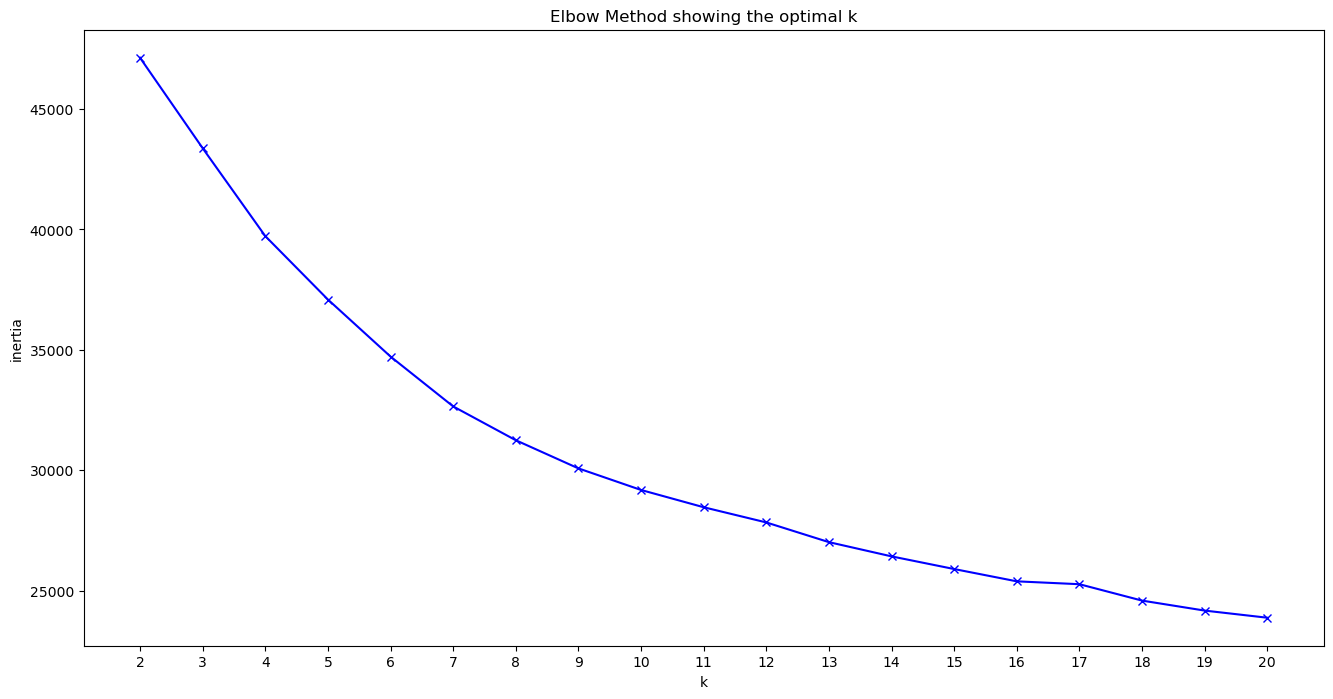

In [130]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(modplaylist_df_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

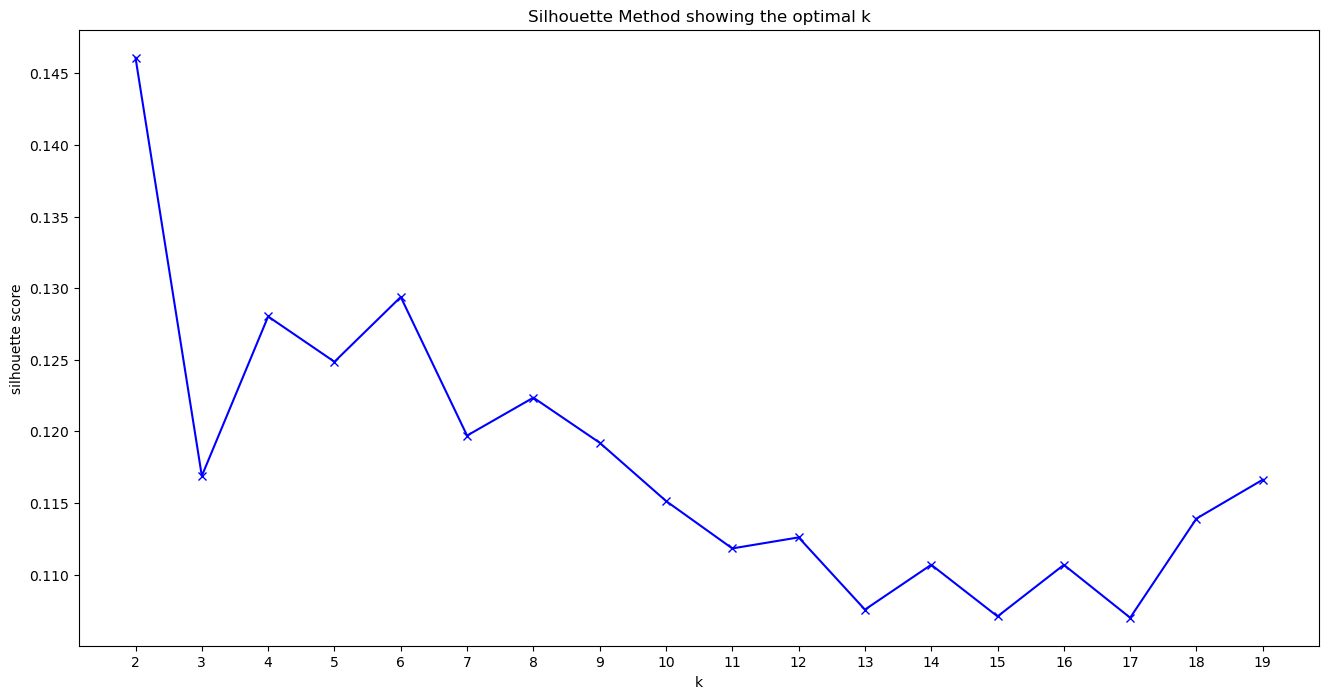

In [131]:
#using silhuoette

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init='auto')
    kmeans.fit(modplaylist_df_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    # with open(filename, "wb") as f:
    #     pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(modplaylist_df_scaled_df, kmeans.predict(modplaylist_df_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [132]:
#set the number of cluster
kmeans = KMeans(n_clusters=14, random_state=1234)
kmeans.fit(modplaylist_df_scaled_df)

C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=14, random_state=1234)

In [133]:
#shows the array of clusters
labels = kmeans.labels_
labels

array([11,  2,  7, ...,  3,  4,  2])

In [134]:
#displays the uniques values of clusters
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [135]:
clusters = kmeans.predict(modplaylist_df_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     256
1     330
2     347
3     320
4     223
5     320
6     413
7     390
8     464
9     167
10    423
11    391
12    389
13     23
Name: count, dtype: int64

In [136]:
clusters

array([11,  2,  7, ...,  3,  4,  2])

In [137]:
#X_df = pd.DataFrame(X)
playlist_df["cluster"] = clusters
playlist_df = playlist_df.reset_index(drop = True)
playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature,cluster
0,0.788,0.649,2,-9.674,1,0.0532,0.2530,0.01360,0.1200,0.229,113.009,2kaH2Z8ezDUKf6fNw250rZ,4,11
1,0.823,0.415,5,-10.845,0,0.0637,0.4710,0.03160,0.1280,0.488,113.976,0zVk3uuV9UhxAt48F3OL12,4,2
2,0.775,0.662,10,-7.755,1,0.0408,0.1170,0.06480,0.0928,0.257,112.014,4nFrcGM7MY1mpoQCC7Kefj,4,7
3,0.842,0.504,1,-7.557,1,0.0534,0.0246,0.01390,0.0698,0.495,112.995,5tpft20jhQvRlG3O7XfwWy,4,11
4,0.776,0.780,10,-4.374,0,0.1280,0.0622,0.00000,0.0810,0.666,124.949,0pqnGHJpmpxLKifKRmU6WP,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,0.751,0.703,9,-5.687,1,0.0287,0.3680,0.00123,0.1960,0.907,97.931,1QaJWSCk3UMKLotnPCIHh1,4,8
4452,0.652,0.940,2,-7.927,1,0.0776,0.0398,0.78200,0.0567,0.720,91.242,5h6SovHOYpIMlAkafxcbq3,4,4
4453,0.595,0.996,2,-3.418,1,0.0599,0.1950,0.03450,0.0351,0.376,152.049,5o37x6LpNSec4jSfPIChsQ,4,3
4454,0.615,0.910,11,-4.248,1,0.0347,0.5000,0.51100,0.2810,0.770,111.013,4hq0S6wznq7SHDyMOFXL9i,4,4


In [138]:
playlist_df[playlist_df['cluster'] == 2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature,cluster
251,0.614,0.568,7,-5.477,0,0.0276,0.00797,0.0,0.0997,0.516,107.849,3YuaBvuZqcwN3CEAyyoaei,4,2


In [139]:
#retrive the track id
track_id = playlist_df['id'][2505]
track_id

'0eZBeB2xFIS65jQHerispi'

In [140]:
#define a function called play_song to play songs based on track id
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [141]:
track_id = '7BuR7aWjwtMnejLYeh8FZk'
#track_id= 'spotify:track:7BuR7aWjwtMnejLYeh8FZk'
IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [142]:
play_song('7BuR7aWjwtMnejLYeh8FZk')

In [143]:
playlist_df.keys()

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'time_signature', 'cluster'],
      dtype='object')

In [144]:
#define a function called play_song to play songs based on track id
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [145]:
import random

In [146]:

def recommender(user_input):
    # get the id of the song via api
    api_results = sp.search(q=user_input,limit=1)     # This returns a dictionary
    song_id = api_results['tracks']['items'][0]['id'] # this gives the id
    
    #displays and plays the song from the song_id
    display(play_song(song_id))
    
    # Song was not found in the playlist_DF -->
    features = sp.audio_features(song_id)[0]                                                        # Spotify Api call to get the audio features of the requested song (dict)
    relevant_features = {k:v for k,v in features.items() if k in modplaylist_df_scaled_df.keys()}   # create a new Dict with only the relevant features for the clustering
    df = pd.DataFrame([relevant_features])                                                          # create a DF of the features (only one row)
    scal = scaler.transform(df)                                                                     # transform the DF with the scaler
    prediction = kmeans.predict(scal)[0]                                                            # use Kmeans to predict the cluster #kmeans.predict(modplaylist_df_scaled_df
    cluster_df = playlist_df[playlist_df.cluster == prediction]                                     # create a new DF with only songs from the cluster
    cluster_df = cluster_df.reset_index(drop = True)                                                # reset index
    random_song_index = random.randint(0, len(cluster_df))                                          # generate a random integer between 0 and the number of songs in the new df
    random_song_id = cluster_df['id'][random_song_index]                                            # randomly pick a song from the cluster
       
    #print(f'Good Choice, here is your Song. You might also enjoy {random_track_title} by {random_track_artist}') # print                      
        
    return IFrame(src="https://open.spotify.com/embed/track/"+random_song_id,                       # the same return as in the play_song Function above 
        width="320",                                                                                 # displays the spotify player in an IFrame
        height="80",
        frameborder="0",
        allowtransparency="true",
        allow="encrypted-media",
        )

In [147]:
# def MusicManager():
#     user_input = input('Pick a song')
#     try:
#         return recommender(user_input)
#     except:
#         print('something went wrong, please try again')

In [148]:
#MusicManager()

In [149]:
#macarena = sp.search(q="macarena",limit=1) 

In [150]:
#macarena["tracks"]["items"][0]["id"]

In [151]:
playlist_df[playlist_df.id == '7BuR7aWjwtMnejLYeh8FZk']

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature,cluster
2199,0.594,0.577,0,-12.772,1,0.0534,0.0215,0.00792,0.883,0.89,110.783,7BuR7aWjwtMnejLYeh8FZk,4,0


In [154]:
# Convert the "SONG" column values to lowercase for case-insensitive comparison
user_input = input("Enter your current hot song: ")

hot100_df_songs = hot100_df["SONG"].str.lower()
fav_df_songs = fav_df["SONG"].str.lower()

#if user_input in hot100_df_songs
if user_input in hot100_df_songs.values:
    # Recommend another song from hot100_df
    rec_song_hot = hot100_df[hot100_df_songs != user_input]["SONG"].iloc[0]
    print(f"Great choice! You might also like '{rec_song_hot}' from the hot list.")
    
    # Check for recommendation in fav_df as well
    if user_input in fav_df_songs.values:
        # Recommend another favorite song different from hot100_df recommendation
        rec_song_fav = fav_df[fav_df_songs != user_input]["SONG"].iloc[0]
        while rec_song_fav == rec_song_hot:  # Ensure the recommendation is different
            rec_song_fav = fav_df[fav_df_songs != user_input]["SONG"].iloc[0]
        print(f"Awesome taste! You might also like '{rec_song_fav}' from my favorite songs.")
else:
    if user_input in fav_df_songs.values:
        # Recommend another favorite song
        recommended_song = fav_df[fav_df_songs != user_input]["SONG"].iloc[0]
        print(f"Awesome taste! You might also like '{recommended_song}' from my favorite songs.")
    else:
        print(f"Sorry, '{user_input}' is not in the hot list or my favorite songs.")
        recommender_result = recommender(user_input)
        # You can display the recommender result as per your requirements
        print(f'Good Choice, here is your Song. You might also enjoy:')
        display(recommender_result)

Enter your current hot song:  atemlos


Sorry, 'atemlos' is not in the hot list or my favorite songs.


Good Choice, here is your Song. You might also enjoy:


C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
sail_boat = sp.search(q="sail boat",limit=1) 

In [ ]:
sail_boat["tracks"]["items"][0]["id"]

In [ ]:
#playlist_df[playlist_df.id == '2wT3VvoiJm0LFZyQrfkQYz']
playlist_df[playlist_df.id == '2wT3VvoiJm0LFZyQrfkQYz']

In [ ]:
#the songs are not in the cluster

## Getting the track_id

## Embeded track player

## Extracting a song from a playlist

In [ ]:
#1 Create a model steps
# - Duplicate the df
# - Numerical variables
# - Scale
# - Train Kmeans ( + pickle)

#2. User input a song
# - search  id
# - get the audio features
# - scale the song
# - predict the cluster it belongs to
# - recommend a random song from the cluster
